# Loading

In [ ]:
! pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from scipy import stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
import lightgbm as lgb

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/training.csv')
# data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.csv')
data=pd.read_csv('/content/training.csv')
display(data.head())
print(data.shape)

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0


(228216, 26)


In [ ]:
df=data.copy()

In [ ]:
df.shape

(228216, 26)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228216 entries, 0 to 228215
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_policy               228216 non-null  object 
 1   year                    228216 non-null  float64
 2   pol_no_claims_discount  228216 non-null  float64
 3   pol_coverage            228216 non-null  object 
 4   pol_duration            228216 non-null  int64  
 5   pol_sit_duration        228216 non-null  int64  
 6   pol_pay_freq            228216 non-null  object 
 7   pol_payd                228216 non-null  object 
 8   pol_usage               228216 non-null  object 
 9   drv_sex1                228216 non-null  object 
 10  drv_age1                228216 non-null  float64
 11  drv_age_lic1            228216 non-null  float64
 12  drv_drv2                228216 non-null  object 
 13  drv_sex2                228216 non-null  object 
 14  drv_age2            

Datatypes seem to be properly assigned. No casting required

In [ ]:
df[df['id_policy']=='PL000000']

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
108697,PL000000,2.0,0.280,Med2,6,2,Monthly,No,WorkPrivate,M,36.0,17.0,Yes,F,27.0,2.0,aparvvfowrjncdhp,9.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
131089,PL000000,3.0,0.225,Med2,7,3,Monthly,No,WorkPrivate,M,37.0,18.0,Yes,F,28.0,3.0,aparvvfowrjncdhp,10.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
171371,PL000000,4.0,0.166,Med2,8,4,Monthly,No,WorkPrivate,M,38.0,19.0,Yes,F,29.0,4.0,aparvvfowrjncdhp,11.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0


**There are 57054 unique policies with 4 year data**

In [ ]:
df['vh_make_model'].nunique() # there are 975 different vehicle types

975

In [ ]:
df.apply(lambda x: x.unique())

,0
id_policy,"[PL000000, PL042495, PL042496, PL042497, PL042..."
year,"[1.0, 2.0, 3.0, 4.0]"
pol_no_claims_discount,"[0.332, 0.0, 0.196, 0.018, 0.087, 0.584, 0.381..."
pol_coverage,"[Med2, Med1, Max, Min]"
pol_duration,"[5, 6, 2, 8, 1, 4, 29, 14, 27, 22, 11, 10, 3, ..."
pol_sit_duration,"[1, 5, 2, 3, 7, 4, 16, 6, 8, 9, 10, 23, 15, 11..."
pol_pay_freq,"[Monthly, Yearly, Quarterly, Biannual]"
pol_payd,"[No, Yes]"
pol_usage,"[WorkPrivate, Retired, Professional, AllTrips]"
drv_sex1,"[M, F]"


In [ ]:
df.apply(lambda x: x.nunique())

,0
id_policy,57054
year,4
pol_no_claims_discount,88
pol_coverage,4
pol_duration,44
pol_sit_duration,26
pol_pay_freq,4
pol_payd,2
pol_usage,4
drv_sex1,2


# Uni & Bi variate Analysis

In [ ]:
plt.rcParams['figure.figsize']=[20,10]

In [ ]:
cols= df.drop(['year','pol_duration','pol_sit_duration'],axis=1).select_dtypes(include=np.number).columns.to_list()
print(len(cols))
print(cols)

12
['pol_no_claims_discount', 'drv_age1', 'drv_age_lic1', 'drv_age2', 'drv_age_lic2', 'vh_age', 'vh_speed', 'vh_value', 'vh_weight', 'population', 'town_surface_area', 'claim_amount']


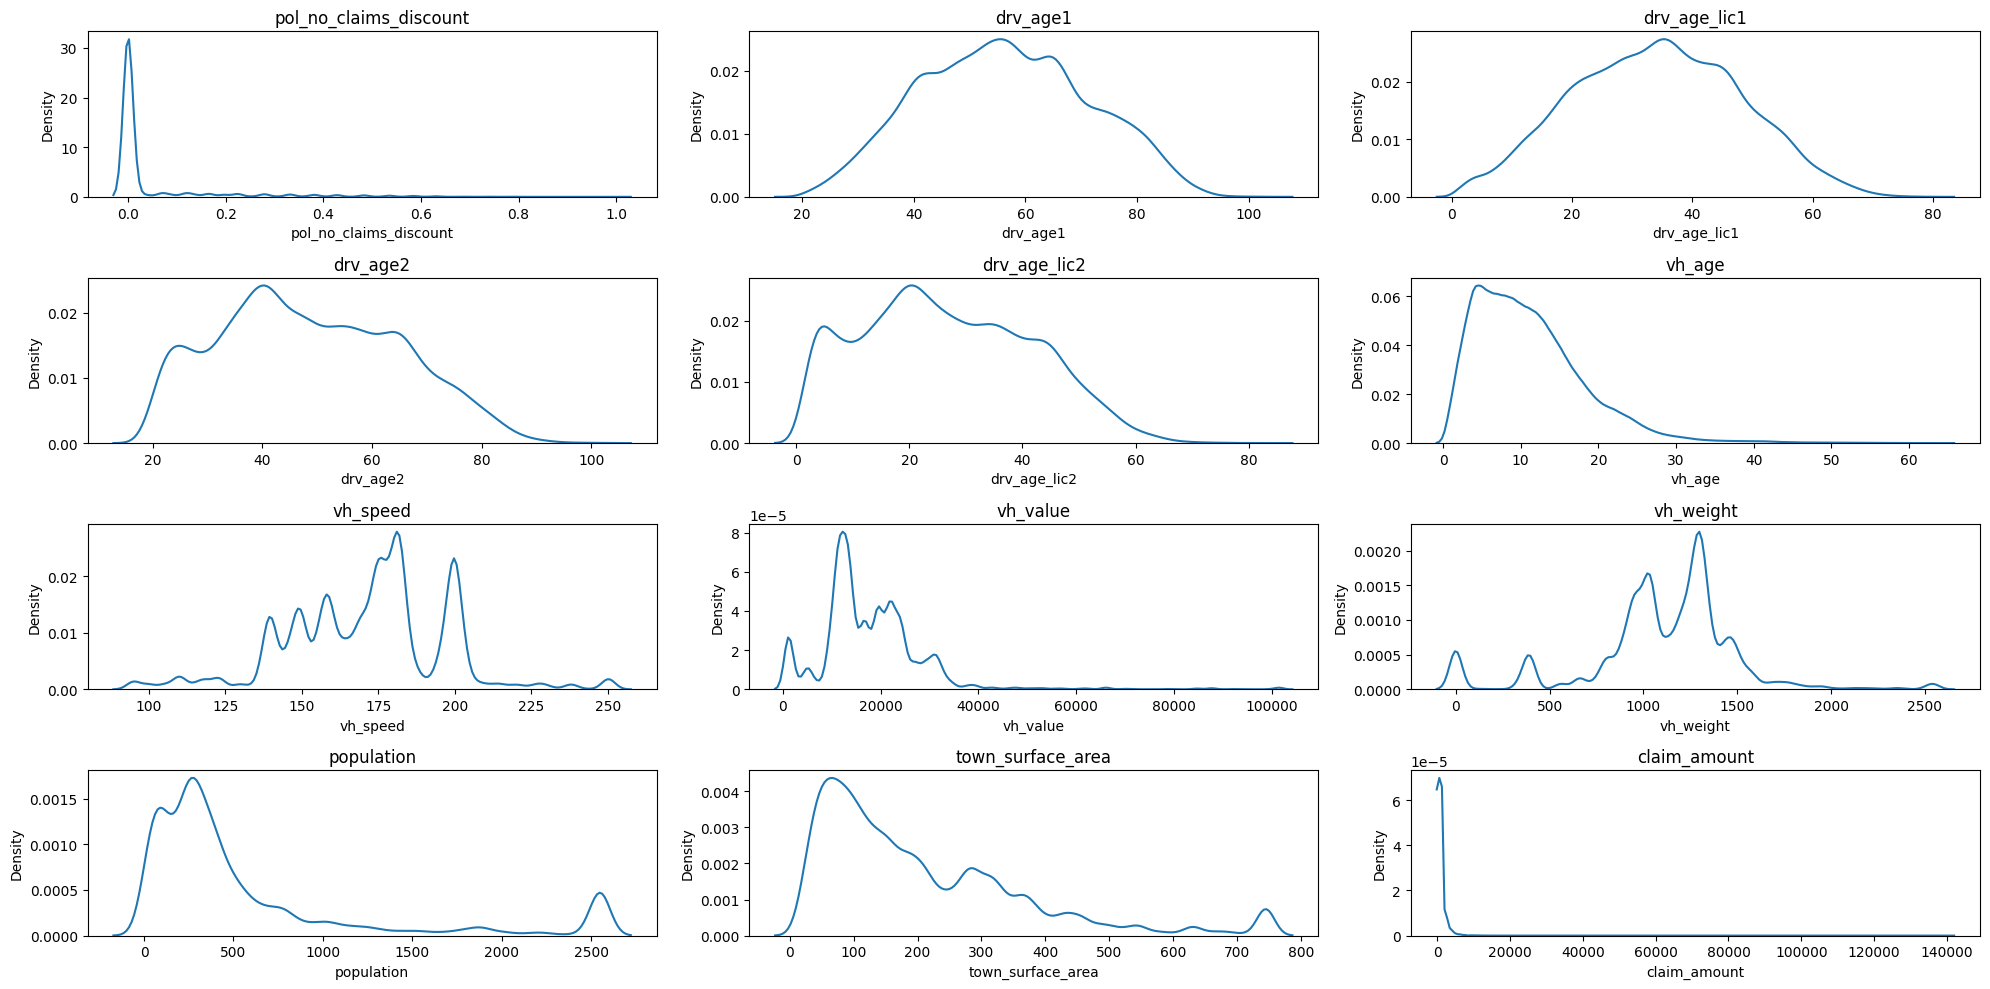

In [ ]:
t=1
for i in cols:
  plt.subplot(4,3,t)
  plt.title(i)
  sns.kdeplot(df[i])
  t+=1
plt.tight_layout()
plt.show()

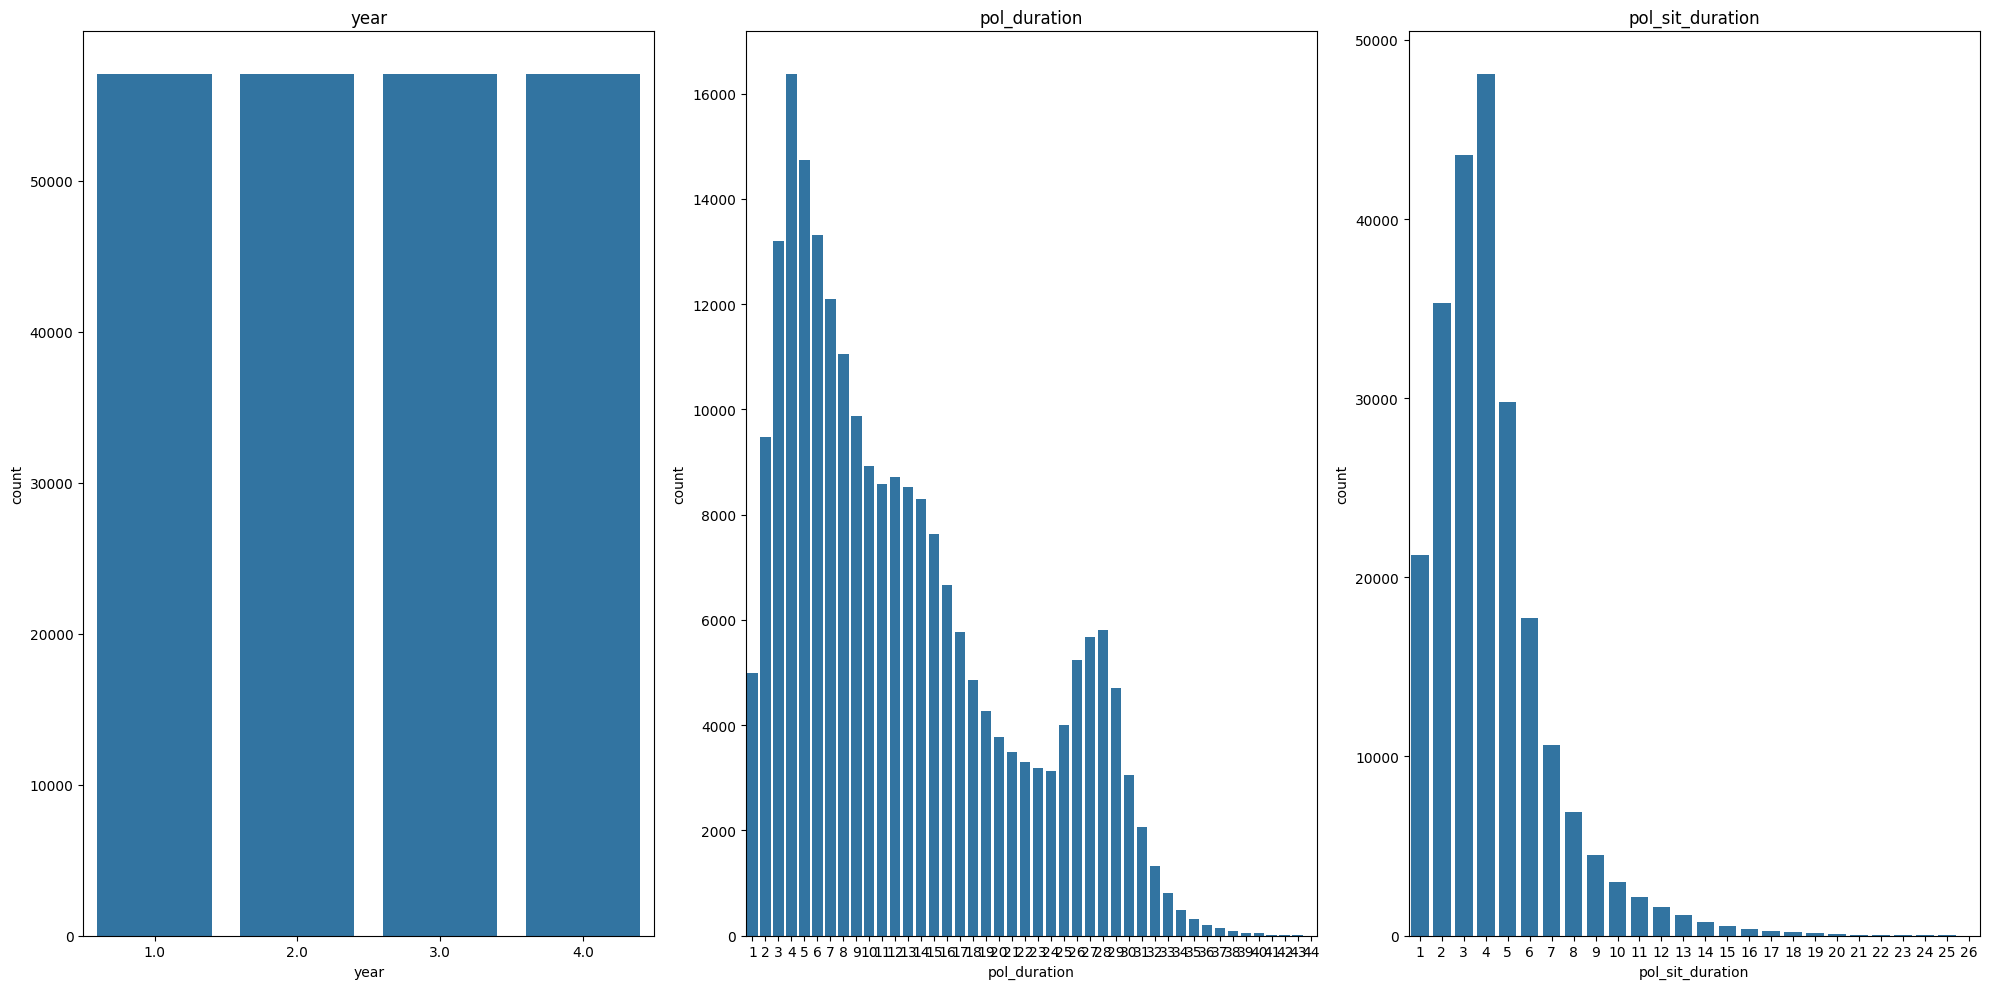

In [ ]:
cols = ['year','pol_duration','pol_sit_duration']
t=1
for i in cols:
  plt.subplot(1,3,t)
  plt.title(i)
  sns.barplot(df[i].value_counts())
  t+=1
plt.tight_layout()
plt.show()
# sns.barplot(df['year'].value_counts())

In [ ]:
cat=df.select_dtypes(include=object).columns.to_list()
cat

['id_policy',
 'pol_coverage',
 'pol_pay_freq',
 'pol_payd',
 'pol_usage',
 'drv_sex1',
 'drv_drv2',
 'drv_sex2',
 'vh_make_model',
 'vh_fuel',
 'vh_type']

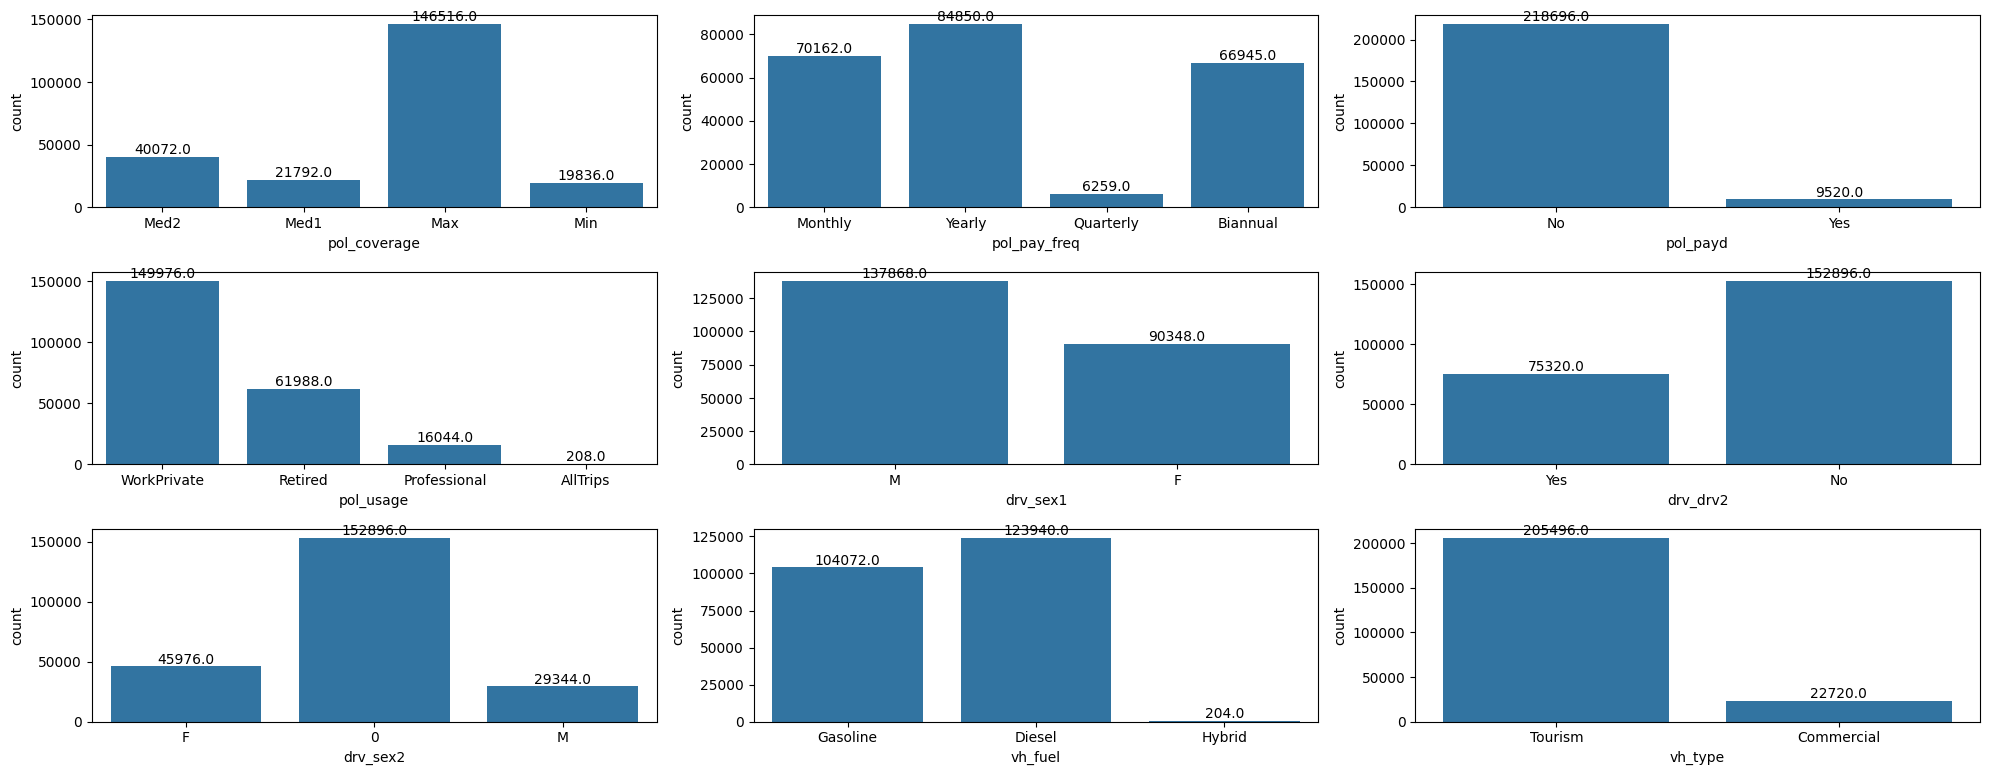

In [ ]:
t=1
for i in cat:
  if i not in ['vh_make_model','id_policy']:
    plt.subplot(4,3,t)
    ax = sns.countplot(x=df[i]) # Assign the plot to an axes object
    # plt.title(i)
    t+=1

    # Add numerical values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
df[cat].apply(lambda x : x.nunique())

,0
id_policy,57054
pol_coverage,4
pol_pay_freq,4
pol_payd,2
pol_usage,4
drv_sex1,2
drv_drv2,2
drv_sex2,3
vh_make_model,975
vh_fuel,3


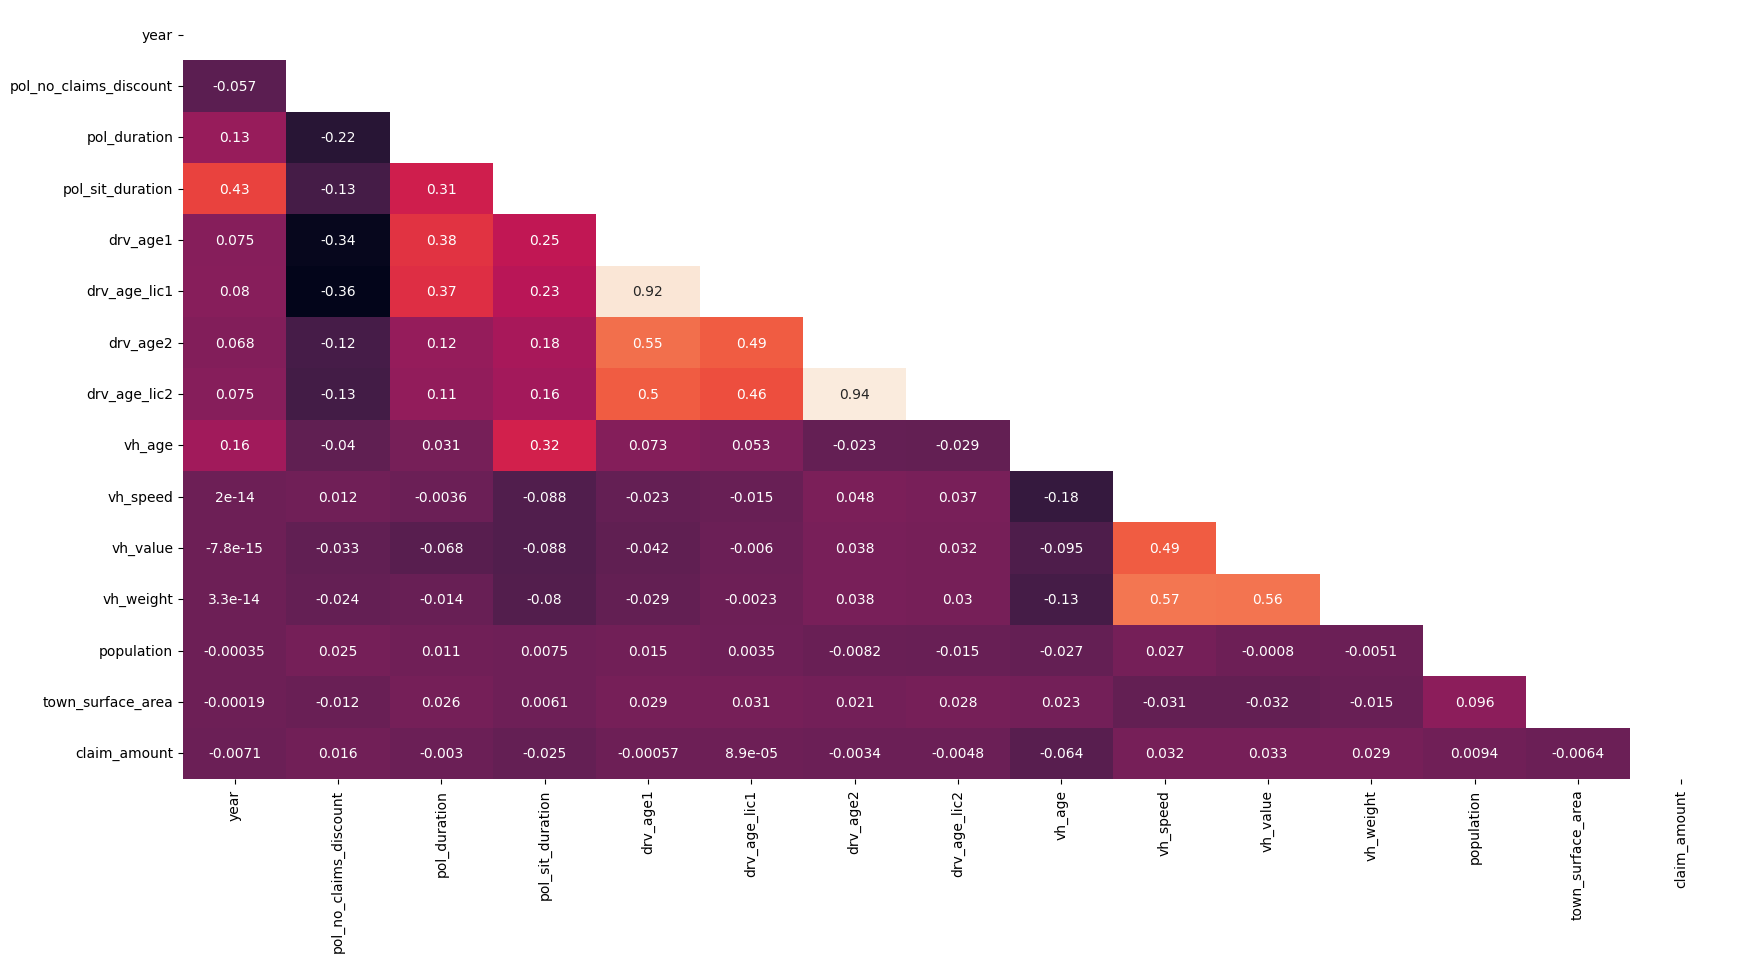

In [ ]:
num = df.select_dtypes(include=np.number).columns.to_list()
sns.heatmap(df[num].corr(),annot=True,mask=np.triu(df[num].corr()),cbar=False)
plt.show()

Low correlation between target and independent numerical variables

# Null value treatment

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
drv_age2,152896
drv_age_lic2,152896
vh_age,4
vh_speed,2552
vh_value,2552
vh_weight,2552


<Axes: >

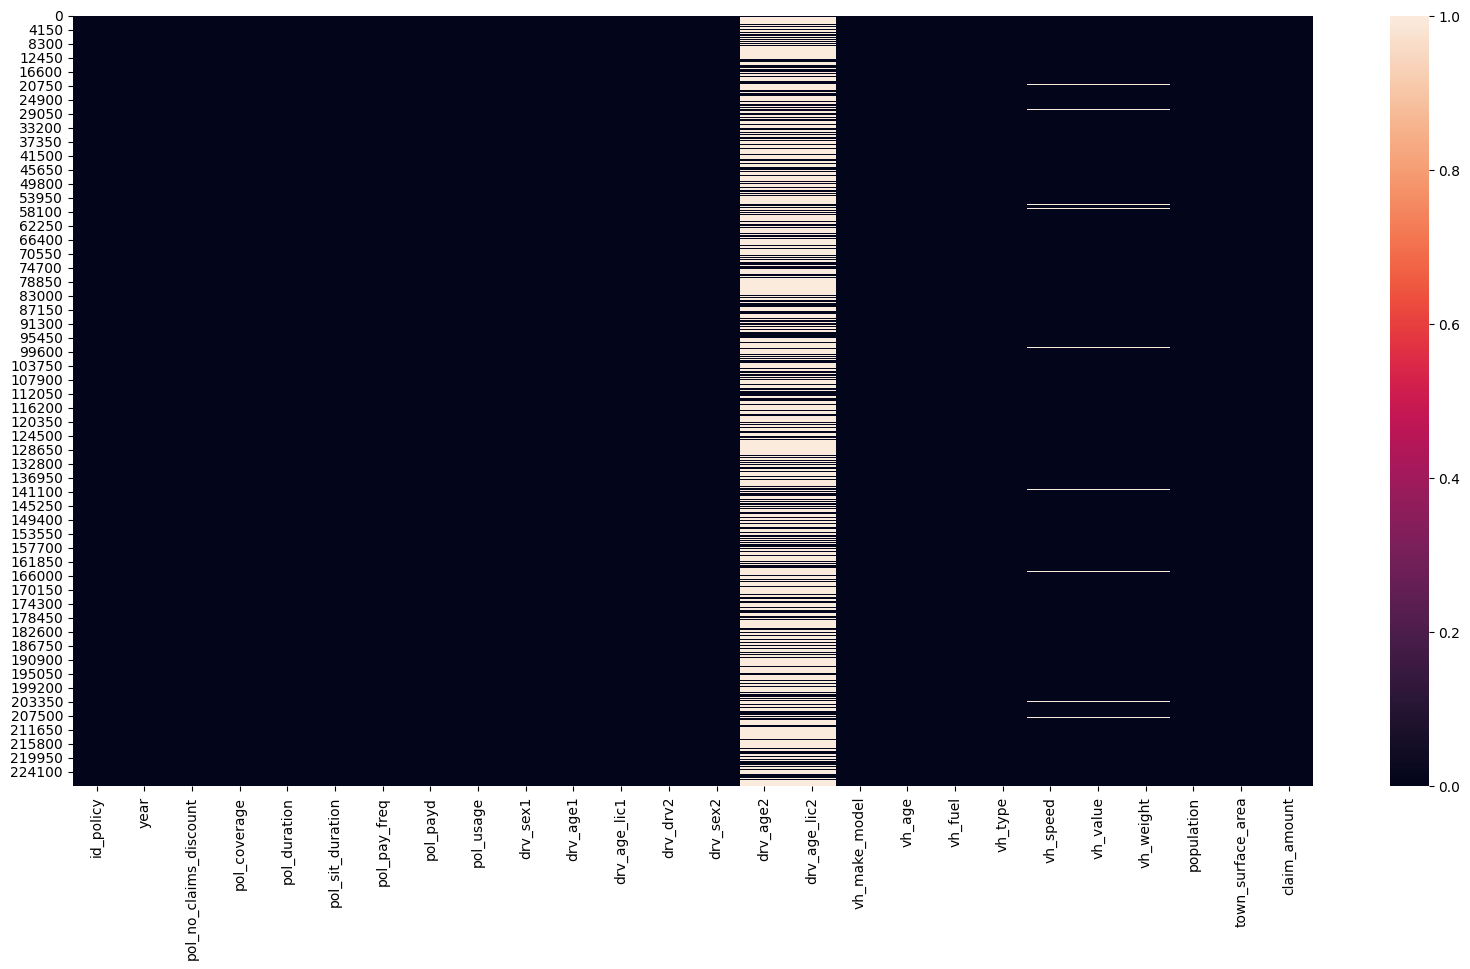

In [ ]:
plt.rcParams['figure.figsize']=[20,10]
null = df.isnull()
sns.heatmap(null)

 Vh speed,value,weight imputation and vh_age imputation

### Steps done:
* replaced drv_sex2 zero with not applicable
* vh speed, value, weight -> median
* vh_age one entry changed
* drv_age2 and drv_age_lic2 replaced with -1

In [ ]:

df['drv_sex2'].replace(0,'Not_Applicable', inplace=True)

df['vh_speed'].fillna(df['vh_speed'].median(),inplace=True)
df['vh_value'].fillna(df['vh_value'].median(),inplace=True)
df['vh_weight'].fillna(df['vh_weight'].median(),inplace=True)


df_vh_age_na = df[(df['vh_make_model']=='coufviypetbrtevy')& (df['vh_type']=='Tourism')&(df['year']==1)&(df['drv_sex1']=='M')&(df['drv_drv2']=='No')&(df['pol_pay_freq']=='Monthly')&(df['pol_usage']=='WorkPrivate')&(df['pol_coverage']=='Med2')]
vh_age_med = round(df_vh_age_na['vh_age'].median())
age_ind = df[(df['vh_age'].isna())&(df['year']==1)].index
df.loc[age_ind,'vh_age']=vh_age_med

for i in range(2,5):
  j = df[(df['vh_age'].isna())&(df['year']==i)].index
  df.loc[j,'vh_age']=vh_age_med+(i-1) # vehicle age null values imputed (4 values)

df[['drv_age2','drv_age_lic2']] = df[['drv_age2','drv_age_lic2']].fillna(-1,axis=1) # use this when you need to use drv2 details

In [ ]:
df.isnull().sum()

,0
id_policy,0
year,0
pol_no_claims_discount,0
pol_coverage,0
pol_duration,0
pol_sit_duration,0
pol_pay_freq,0
pol_payd,0
pol_usage,0
drv_sex1,0


In [ ]:
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,-1.0,-1.0,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,-1.0,-1.0,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,-1.0,-1.0,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0


# Outliers

In [ ]:
out =df.copy()

In [ ]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228216 entries, 0 to 228215
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_policy               228216 non-null  object 
 1   year                    228216 non-null  float64
 2   pol_no_claims_discount  228216 non-null  float64
 3   pol_coverage            228216 non-null  object 
 4   pol_duration            228216 non-null  int64  
 5   pol_sit_duration        228216 non-null  int64  
 6   pol_pay_freq            228216 non-null  object 
 7   pol_payd                228216 non-null  object 
 8   pol_usage               228216 non-null  object 
 9   drv_sex1                228216 non-null  object 
 10  drv_age1                228216 non-null  float64
 11  drv_age_lic1            228216 non-null  float64
 12  drv_drv2                228216 non-null  object 
 13  drv_sex2                228216 non-null  object 
 14  drv_age2            

In [ ]:
num = out.select_dtypes(include=np.number).columns.to_list()
cat = out.select_dtypes(exclude=np.number).columns.to_list()
len(num),len(cat)

(15, 11)

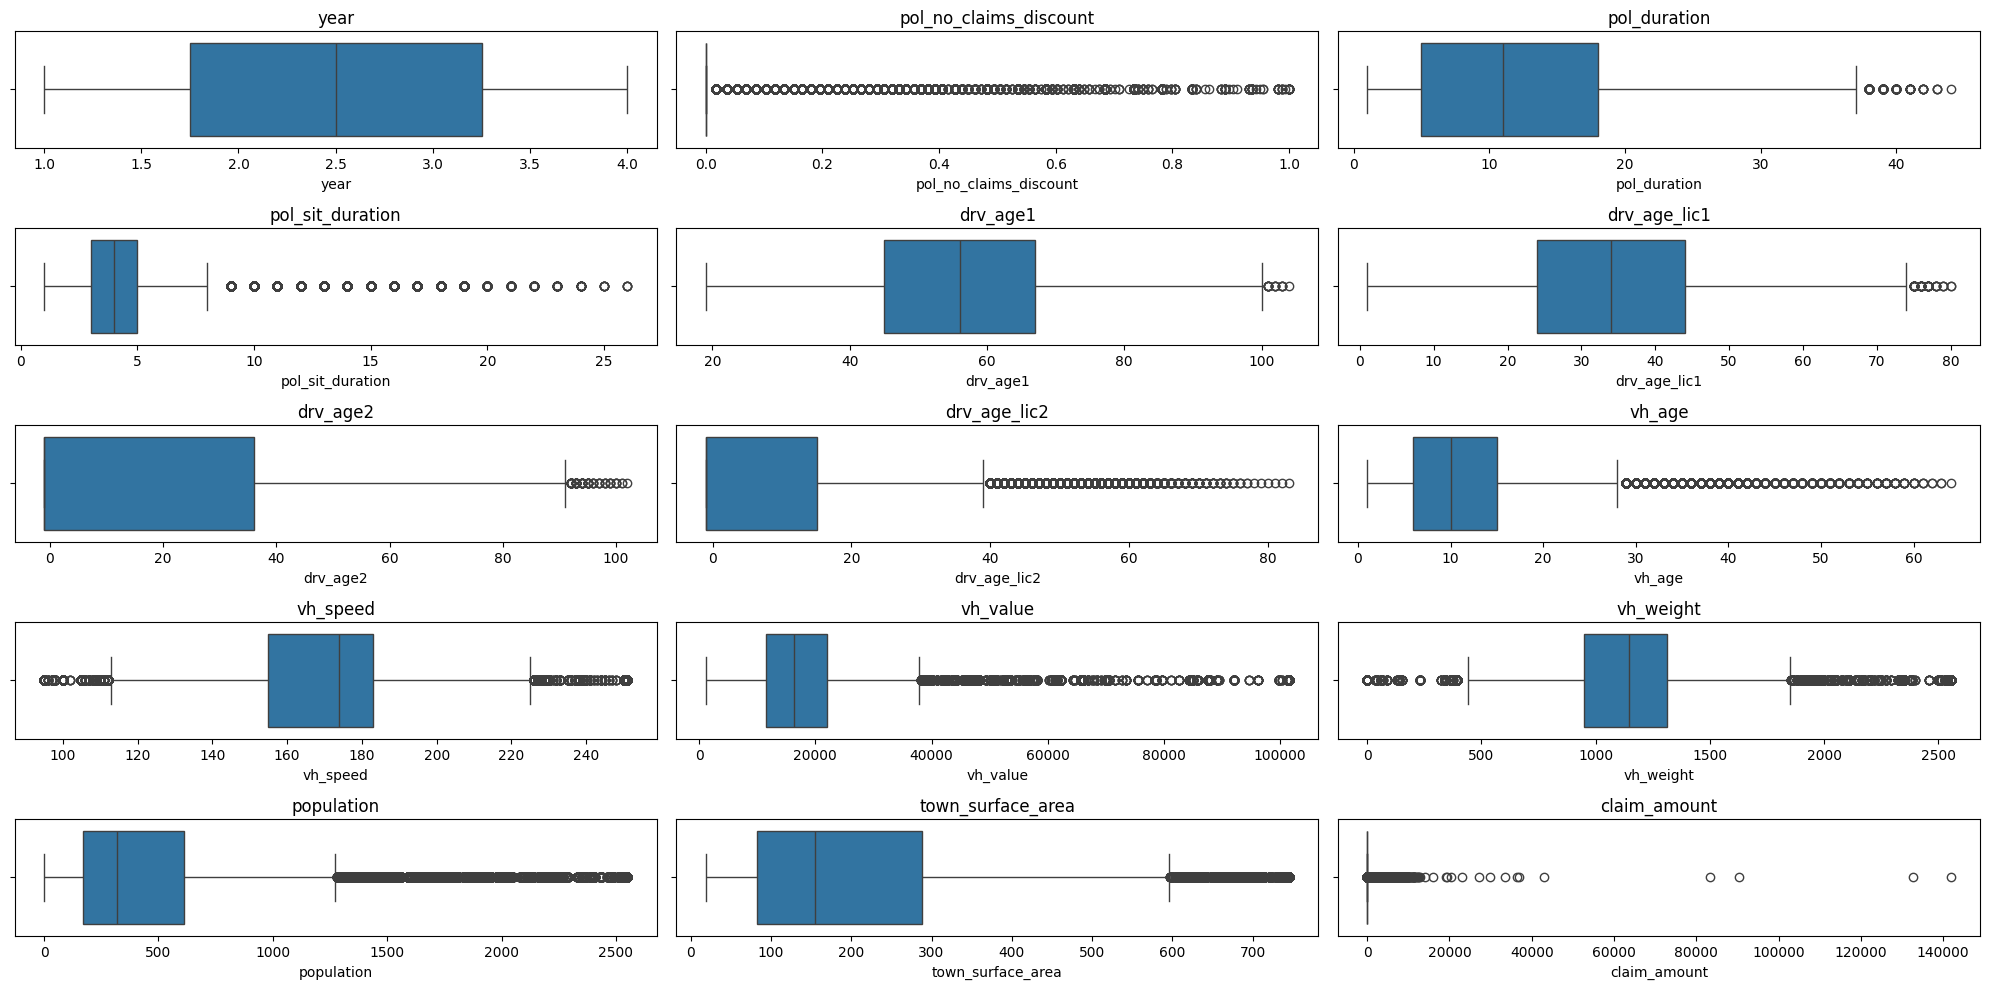

In [ ]:
plt.rcParams['figure.figsize']=[20,10]
t=1
for i in num:
  plt.subplot(5,3,t)
  plt.title(i)
  sns.boxplot(data=df,x=i)
  t+=1
plt.tight_layout()
plt.show()

In [ ]:
q1=out[num].quantile(0.25)
q3=out[num].quantile(0.75)
iqr=q3-q1
lw = q1 - (1.5 * iqr)
uw = q3 + (1.5 * iqr)
for i in num:
  temp = out[(out[i]<lw[i]) |(out[i]>uw[i])]
  print(i,': ',len(temp))

year :  0
pol_no_claims_discount :  43937
pol_duration :  218
pol_sit_duration :  14909
drv_age1 :  16
drv_age_lic1 :  57
drv_age2 :  88
drv_age_lic2 :  17004
vh_age :  5179
vh_speed :  11280
vh_value :  5600
vh_weight :  25400
population :  27736
town_surface_area :  9472
claim_amount :  23292


In [ ]:
for i in num:
  temp = out[(out[i]<lw[i]) |(out[i]>uw[i])]
  print(i)
  display(temp)

year


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount


pol_no_claims_discount


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
6,PL042505,1.0,0.018,Max,1,1,Yearly,No,WorkPrivate,M,41.0,20.0,No,0,-1.0,-1.0,eslneidrjqwzpqhd,1.0,Gasoline,Tourism,160.0,15245.0,1019.0,550.0,74.0,0.0
8,PL042507,1.0,0.087,Med1,1,1,Yearly,No,WorkPrivate,M,44.0,22.0,No,0,-1.0,-1.0,kvcddisqpkysmvvo,12.0,Diesel,Tourism,149.0,17233.0,1012.0,140.0,397.2,0.0
9,PL042509,1.0,0.584,Min,6,3,Quarterly,No,WorkPrivate,M,53.0,34.0,No,0,-1.0,-1.0,pheduvdlnmrchihf,14.0,Gasoline,Tourism,189.0,31627.0,1312.0,810.0,460.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228203,PL052241,4.0,0.405,Max,35,5,Monthly,No,Retired,M,69.0,48.0,Yes,F,68.0,38.0,wpsyqubfrhdspxkx,6.0,Gasoline,Tourism,155.0,9554.0,560.0,250.0,259.9,0.0
228206,PL064657,4.0,0.428,Med1,4,4,Biannual,No,WorkPrivate,M,66.0,48.0,No,0,-1.0,-1.0,dlrodwgixwmoquny,15.0,Diesel,Commercial,145.0,23028.0,760.0,2550.0,179.6,0.0
228208,PL060930,4.0,0.070,Med1,10,9,Yearly,No,WorkPrivate,M,44.0,24.0,No,0,-1.0,-1.0,rrqbtdjvuwwxtusj,16.0,Diesel,Tourism,149.0,4711.0,0.0,710.0,304.7,0.0
228211,PL008818,4.0,0.087,Med2,4,4,Monthly,No,WorkPrivate,F,50.0,28.0,Yes,F,23.0,5.0,ubttjiaeeuwzcclq,15.0,Diesel,Tourism,179.0,16047.0,955.0,1030.0,95.3,0.0


pol_duration


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
5459,PL038592,1.0,0.0,Med2,38,13,Yearly,No,Retired,M,82.0,46.0,No,0,-1.0,-1.0,bpuzzsqfyvebjzjg,15.0,Gasoline,Commercial,122.0,5931.0,783.0,300.0,159.3,0.0
6119,PL052145,1.0,0.0,Max,40,5,Yearly,No,Retired,F,77.0,46.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,7.0,Gasoline,Tourism,140.0,1113.0,393.0,260.0,378.9,0.0
7199,PL051907,1.0,0.0,Max,38,7,Yearly,No,Retired,M,84.0,66.0,No,0,-1.0,-1.0,johsjccpkithubii,8.0,Gasoline,Tourism,177.0,11490.0,950.0,90.0,112.3,0.0
8765,PL054231,1.0,0.0,Max,39,11,Biannual,No,Retired,M,79.0,56.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,9.0,Gasoline,Tourism,182.0,12820.0,1036.0,2550.0,162.3,0.0
10213,PL046972,1.0,0.0,Med2,38,18,Yearly,No,Retired,F,85.0,45.0,No,0,-1.0,-1.0,rrqbtdjvuwwxtusj,15.0,Gasoline,Tourism,149.0,4711.0,0.0,20.0,242.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226221,PL051907,4.0,0.0,Max,41,10,Yearly,No,Retired,M,87.0,69.0,No,0,-1.0,-1.0,johsjccpkithubii,11.0,Gasoline,Tourism,177.0,11490.0,950.0,90.0,112.3,0.0
227161,PL007929,4.0,0.0,Max,39,9,Biannual,No,WorkPrivate,M,70.0,37.0,No,0,-1.0,-1.0,jhdjdpthkztnjvmb,7.0,Gasoline,Tourism,138.0,17126.0,1110.0,1200.0,158.9,0.0
227273,PL006355,4.0,0.0,Min,38,7,Yearly,No,WorkPrivate,F,85.0,55.0,No,0,-1.0,-1.0,yzxgnwgpnrdprtbh,27.0,Diesel,Tourism,167.0,12282.0,980.0,520.0,488.0,0.0
227514,PL006877,4.0,0.0,Max,40,4,Biannual,No,Retired,M,73.0,55.0,Yes,F,76.0,38.0,ewkcexkqpsyfnugi,5.0,Diesel,Tourism,177.0,16280.0,990.0,200.0,111.6,0.0


pol_sit_duration


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
29,PL042546,1.0,0.00,Min,16,16,Yearly,No,Retired,M,75.0,54.0,No,0,-1.0,-1.0,gjxmrfgnorpfspbb,13.0,Diesel,Tourism,175.0,23889.0,1167.0,370.0,110.1,0.0
87,PL042551,1.0,0.00,Min,22,9,Yearly,No,Retired,M,91.0,65.0,No,0,-1.0,-1.0,xhczitnzxmxxebeq,13.0,Diesel,Tourism,215.0,39676.0,1506.0,140.0,79.6,0.0
90,PL042653,1.0,0.00,Max,15,10,Monthly,No,Retired,F,88.0,61.0,No,0,-1.0,-1.0,zoypfizhpbtpjwpv,18.0,Gasoline,Tourism,145.0,10896.0,660.0,240.0,309.3,0.0
108,PL042642,1.0,0.00,Med2,23,23,Yearly,No,WorkPrivate,F,83.0,62.0,No,0,-1.0,-1.0,wyqgeeclrqbihfpk,15.0,Gasoline,Tourism,138.0,10238.0,339.0,520.0,194.5,0.0
153,PL042561,1.0,0.00,Min,18,15,Yearly,No,WorkPrivate,M,58.0,40.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,13.0,Diesel,Tourism,182.0,12820.0,1036.0,150.0,141.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228201,PL057987,4.0,0.00,Min,37,12,Yearly,No,Retired,F,79.0,60.0,No,0,-1.0,-1.0,jgkpiuuctpywtrlh,16.0,Diesel,Commercial,118.0,10047.0,1210.0,250.0,81.9,0.0
228207,PL055869,4.0,0.00,Max,11,11,Biannual,No,Retired,F,68.0,39.0,Yes,F,75.0,52.0,zqruwnlzuefcpqjm,15.0,Gasoline,Tourism,159.0,9818.0,809.0,1400.0,308.2,0.0
228208,PL060930,4.0,0.07,Med1,10,9,Yearly,No,WorkPrivate,M,44.0,24.0,No,0,-1.0,-1.0,rrqbtdjvuwwxtusj,16.0,Diesel,Tourism,149.0,4711.0,0.0,710.0,304.7,0.0
228209,PL055035,4.0,0.00,Max,18,11,Biannual,No,Retired,F,93.0,62.0,No,0,-1.0,-1.0,zqruwnlzuefcpqjm,19.0,Gasoline,Tourism,159.0,9818.0,809.0,70.0,97.5,0.0


drv_age1


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
55373,PL008109,1.0,0.0,Max,15,4,Yearly,No,Retired,M,101.0,74.0,Yes,F,86.0,34.0,biqzvbfzjivqmrro,4.0,Gasoline,Tourism,140.0,1113.0,393.0,1240.0,613.9,0.00
71154,PL040180,2.0,0.0,Min,26,7,Biannual,No,Retired,M,101.0,77.0,No,0,-1.0,-1.0,nhwgapjtnadqqaul,15.0,Gasoline,Tourism,169.0,11854.0,1022.0,290.0,58.2,0.00
92332,PL008109,2.0,0.0,Max,16,5,Yearly,No,Retired,M,102.0,75.0,Yes,F,87.0,35.0,biqzvbfzjivqmrro,5.0,Gasoline,Tourism,140.0,1113.0,393.0,1240.0,613.9,1550.09
94173,PL008525,2.0,0.0,Min,28,10,Yearly,No,Retired,F,101.0,66.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,12.0,Gasoline,Tourism,182.0,12820.0,1036.0,210.0,59.4,0.00
96726,PL087095,2.0,0.0,Max,26,2,Yearly,Yes,Retired,M,101.0,78.0,No,0,-1.0,-1.0,usjukvawgoqplrph,10.0,Gasoline,Tourism,151.0,9983.0,1140.0,2550.0,202.7,0.00
116123,PL008525,3.0,0.0,Min,29,11,Yearly,No,Retired,F,102.0,67.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,13.0,Gasoline,Tourism,182.0,12820.0,1036.0,210.0,59.4,0.00
138310,PL008109,3.0,0.0,Max,17,6,Yearly,No,Retired,M,103.0,76.0,Yes,F,88.0,36.0,biqzvbfzjivqmrro,6.0,Gasoline,Tourism,140.0,1113.0,393.0,1240.0,613.9,0.00
145356,PL040180,3.0,0.0,Min,27,8,Biannual,No,Retired,M,102.0,78.0,No,0,-1.0,-1.0,nhwgapjtnadqqaul,16.0,Gasoline,Tourism,169.0,11854.0,1022.0,290.0,58.2,0.00
153080,PL087095,3.0,0.0,Max,27,3,Yearly,Yes,Retired,M,102.0,79.0,No,0,-1.0,-1.0,usjukvawgoqplrph,11.0,Gasoline,Tourism,151.0,9983.0,1140.0,2550.0,202.7,0.00
175710,PL085801,4.0,0.0,Med2,4,4,Yearly,No,Retired,F,101.0,59.0,No,0,-1.0,-1.0,xjaddkudsebowzen,25.0,Gasoline,Tourism,181.0,21171.0,1305.0,2550.0,301.4,0.00


drv_age_lic1


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
4534,PL040180,1.0,0.000,Min,25,6,Biannual,No,Retired,M,100.0,76.0,No,0,-1.0,-1.0,nhwgapjtnadqqaul,14.0,Gasoline,Tourism,169.0,11854.0,1022.0,290.0,58.2,0.00
30848,PL090871,1.0,0.000,Med2,21,1,Yearly,Yes,Retired,M,93.0,75.0,Yes,F,77.0,58.0,doohwubeqhbkevhr,2.0,Diesel,Tourism,200.0,21998.0,1230.0,480.0,82.7,0.00
31098,PL091365,1.0,0.000,Max,15,7,Biannual,No,Retired,M,94.0,75.0,No,0,-1.0,-1.0,swjkmyqytzxjwgag,9.0,Diesel,Tourism,175.0,23900.0,1285.0,560.0,77.8,0.00
33031,PL087095,1.0,0.000,Max,25,1,Yearly,Yes,Retired,M,100.0,77.0,No,0,-1.0,-1.0,usjukvawgoqplrph,9.0,Gasoline,Tourism,151.0,9983.0,1140.0,2550.0,202.7,0.00
56752,PL012992,1.0,0.000,Max,22,2,Biannual,No,Retired,M,98.0,77.0,No,0,-1.0,-1.0,yfalryaixpzfoihd,1.0,Diesel,Tourism,197.0,27313.0,1437.0,440.0,141.5,0.00
71154,PL040180,2.0,0.000,Min,26,7,Biannual,No,Retired,M,101.0,77.0,No,0,-1.0,-1.0,nhwgapjtnadqqaul,15.0,Gasoline,Tourism,169.0,11854.0,1022.0,290.0,58.2,0.00
72264,PL036424,2.0,0.000,Med2,22,2,Yearly,No,Retired,M,94.0,75.0,No,0,-1.0,-1.0,sbrarddcurfhmmqk,27.0,Diesel,Commercial,95.0,10627.0,1810.0,610.0,304.2,0.00
74957,PL058086,2.0,0.000,Max,12,3,Biannual,No,Retired,M,95.0,75.0,Yes,F,72.0,52.0,yfalryaixpzfoihd,8.0,Diesel,Tourism,197.0,27313.0,1437.0,1010.0,539.9,0.00
92332,PL008109,2.0,0.000,Max,16,5,Yearly,No,Retired,M,102.0,75.0,Yes,F,87.0,35.0,biqzvbfzjivqmrro,5.0,Gasoline,Tourism,140.0,1113.0,393.0,1240.0,613.9,1550.09
96331,PL091365,2.0,0.000,Max,16,8,Biannual,No,Retired,M,95.0,76.0,No,0,-1.0,-1.0,swjkmyqytzxjwgag,10.0,Diesel,Tourism,175.0,23900.0,1285.0,560.0,77.8,0.00


drv_age2


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
1121,PL041925,1.0,0.000,Max,25,2,Biannual,No,Retired,F,70.0,49.0,Yes,M,92.0,72.0,synvsxhrexuyxpre,2.0,Diesel,Tourism,188.0,29775.0,1443.0,2550.0,155.0,2323.95
11067,PL050448,1.0,0.000,Max,2,2,Biannual,No,Retired,F,67.0,33.0,Yes,M,97.0,76.0,saempmkfulqhwfqk,11.0,Gasoline,Tourism,203.0,20912.0,1220.0,270.0,284.1,0.00
14108,PL023815,1.0,0.000,Med1,14,6,Biannual,No,Retired,M,75.0,52.0,Yes,F,92.0,59.0,pjbnwqhnqczouirt,21.0,Gasoline,Tourism,163.0,9140.0,963.0,110.0,113.1,0.00
18552,PL032895,1.0,0.000,Max,14,1,Yearly,Yes,Retired,M,81.0,59.0,Yes,F,98.0,53.0,hpohizpkyzvwunni,13.0,Diesel,Tourism,166.0,15894.0,1135.0,250.0,123.9,0.00
19423,PL035170,1.0,0.000,Max,13,7,Yearly,No,Retired,F,76.0,52.0,Yes,M,99.0,80.0,svmjzfcsvgxiwwjt,11.0,Gasoline,Tourism,180.0,22057.0,1245.0,420.0,478.8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212738,PL030960,4.0,0.000,Max,13,4,Yearly,No,Retired,F,75.0,46.0,Yes,M,92.0,68.0,quslbttvcitxzeiy,7.0,Diesel,Tourism,200.0,19225.0,1310.0,30.0,85.6,0.00
213721,PL032895,4.0,0.000,Max,17,4,Yearly,Yes,Retired,M,84.0,62.0,Yes,F,101.0,56.0,hpohizpkyzvwunni,16.0,Diesel,Tourism,166.0,15894.0,1135.0,250.0,123.9,0.00
218591,PL057361,4.0,0.103,Med1,16,4,Yearly,No,Professional,M,44.0,26.0,Yes,M,96.0,70.0,xzdsapxqliboezbc,14.0,Gasoline,Tourism,168.0,11876.0,1225.0,230.0,191.1,0.00
221738,PL056841,4.0,0.000,Med2,30,5,Biannual,No,Retired,M,85.0,37.0,Yes,F,96.0,62.0,pjbnwqhnqczouirt,29.0,Gasoline,Tourism,163.0,9140.0,963.0,2240.0,273.3,0.00


drv_age_lic2


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
39,PL042524,1.0,0.0,Med1,2,2,Monthly,No,Retired,M,55.0,37.0,Yes,F,64.0,46.0,iulvirmzdntweaee,17.0,Gasoline,Tourism,164.0,14696.0,936.0,250.0,97.2,0.0
52,PL042432,1.0,0.0,Max,26,8,Yearly,No,Retired,F,66.0,28.0,Yes,M,68.0,50.0,iulvirmzdntweaee,13.0,Diesel,Commercial,164.0,14696.0,936.0,980.0,195.6,0.0
57,PL042402,1.0,0.0,Max,20,1,Yearly,No,WorkPrivate,F,63.0,44.0,Yes,M,64.0,46.0,nsymgnybdjqxudvj,2.0,Diesel,Tourism,202.0,22411.0,1330.0,260.0,443.7,0.0
88,PL042552,1.0,0.0,Max,3,3,Biannual,No,Professional,F,60.0,41.0,Yes,M,60.0,42.0,bvuzvpriwqlnbjxt,1.0,Gasoline,Tourism,145.0,16321.0,370.0,420.0,184.0,0.0
102,PL042633,1.0,0.0,Med2,1,1,Yearly,No,Retired,F,59.0,40.0,Yes,M,63.0,44.0,zoypfizhpbtpjwpv,26.0,Gasoline,Tourism,145.0,10896.0,660.0,40.0,135.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228150,PL055084,4.0,0.0,Max,32,4,Yearly,Yes,Retired,M,77.0,56.0,Yes,F,70.0,50.0,lqkdgbosdzrtitgx,15.0,Diesel,Tourism,200.0,22067.0,1291.0,220.0,146.2,0.0
228176,PL061277,4.0,0.0,Med1,14,5,Biannual,No,Professional,M,59.0,40.0,Yes,F,62.0,43.0,dllcylnkzeegtsgr,27.0,Diesel,Commercial,174.0,16321.0,1145.0,260.0,133.7,0.0
228192,PL052236,4.0,0.0,Med2,22,6,Biannual,No,WorkPrivate,F,60.0,36.0,Yes,M,61.0,43.0,jrwdpzrmxqlzzepk,12.0,Diesel,Tourism,168.0,18310.0,1538.0,390.0,431.9,0.0
228207,PL055869,4.0,0.0,Max,11,11,Biannual,No,Retired,F,68.0,39.0,Yes,F,75.0,52.0,zqruwnlzuefcpqjm,15.0,Gasoline,Tourism,159.0,9818.0,809.0,1400.0,308.2,0.0


vh_age


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
265,PL042241,1.0,0.000,Med2,15,3,Biannual,No,WorkPrivate,F,44.0,24.0,No,0,-1.0,-1.0,zqruwnlzuefcpqjm,32.0,Gasoline,Tourism,159.0,9818.0,809.0,550.0,127.4,0.00
304,PL042364,1.0,0.018,Min,18,5,Biannual,No,WorkPrivate,M,54.0,27.0,Yes,F,38.0,16.0,kcfhiwouwwfjqtta,41.0,Gasoline,Tourism,160.0,2093.0,880.0,310.0,745.4,0.00
362,PL043121,1.0,0.000,Med2,17,4,Yearly,No,WorkPrivate,M,56.0,25.0,No,0,-1.0,-1.0,xzdsapxqliboezbc,42.0,Diesel,Tourism,168.0,11876.0,1225.0,310.0,171.4,0.00
365,PL043128,1.0,0.018,Med1,4,4,Monthly,No,WorkPrivate,F,35.0,16.0,No,0,-1.0,-1.0,aparvvfowrjncdhp,38.0,Diesel,Tourism,174.0,11040.0,1143.0,80.0,228.8,423.52
403,PL043040,1.0,0.036,Max,4,3,Monthly,No,WorkPrivate,F,48.0,30.0,No,0,-1.0,-1.0,yybjogamsfqljfpu,30.0,Diesel,Tourism,230.0,28237.0,1490.0,2550.0,241.3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228123,PL064097,4.0,0.000,Med1,17,5,Yearly,No,WorkPrivate,M,54.0,29.0,No,0,-1.0,-1.0,guiimarisyyjqnfg,31.0,Diesel,Tourism,200.0,31069.0,1473.0,220.0,33.5,0.00
228179,PL058505,4.0,0.000,Med1,14,10,Yearly,No,Retired,M,90.0,69.0,No,0,-1.0,-1.0,iknapxqudqotqiig,38.0,Gasoline,Tourism,110.0,7012.0,0.0,320.0,307.3,0.00
228183,PL061168,4.0,0.000,Max,23,15,Biannual,No,WorkPrivate,M,51.0,32.0,No,0,-1.0,-1.0,kzwthrslljkmbqur,35.0,Gasoline,Tourism,158.0,11228.0,992.0,230.0,276.1,0.00
228184,PL058660,4.0,0.000,Med2,35,19,Yearly,No,Retired,F,88.0,59.0,No,0,-1.0,-1.0,jgkpiuuctpywtrlh,33.0,Gasoline,Commercial,118.0,10047.0,1210.0,2020.0,162.1,0.00


vh_speed


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
21,PL042490,1.0,0.000,Max,3,1,Yearly,No,WorkPrivate,M,45.0,23.0,No,0,-1.0,-1.0,byvoguptigfevpyy,6.0,Diesel,Tourism,230.0,39423.0,1422.0,20.0,43.0,0.00
48,PL042425,1.0,0.070,Max,2,1,Yearly,No,WorkPrivate,F,26.0,8.0,No,0,-1.0,-1.0,ajtardhciglimsdi,3.0,Diesel,Tourism,250.0,25250.0,1450.0,70.0,30.8,130.23
80,PL042473,1.0,0.000,Max,30,4,Biannual,No,Retired,M,72.0,53.0,No,0,-1.0,-1.0,jiyzqszfywhdfsil,8.0,Diesel,Commercial,100.0,24210.0,751.0,90.0,122.6,0.00
98,PL042648,1.0,0.000,Med1,7,2,Yearly,No,WorkPrivate,F,59.0,39.0,Yes,M,37.0,18.0,svcvmlpsqtzbrmnz,12.0,Diesel,Tourism,112.0,15090.0,980.0,20.0,110.0,0.00
103,PL042634,1.0,0.000,Min,8,2,Yearly,No,WorkPrivate,M,39.0,20.0,Yes,F,44.0,24.0,mqzhmlqqmpafpbqw,14.0,Gasoline,Tourism,110.0,1342.0,0.0,10.0,294.3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228060,PL058659,4.0,0.018,Max,17,4,Monthly,No,WorkPrivate,M,42.0,24.0,No,0,-1.0,-1.0,vnxfpyxuciadydrl,12.0,Gasoline,Tourism,230.0,53053.0,1256.0,320.0,411.2,0.00
228110,PL052142,4.0,0.000,Min,9,5,Monthly,No,WorkPrivate,F,37.0,18.0,No,0,-1.0,-1.0,iknapxqudqotqiig,27.0,Gasoline,Tourism,110.0,7012.0,0.0,270.0,284.5,0.00
228154,PL008025,4.0,0.018,Max,10,4,Monthly,No,WorkPrivate,M,44.0,26.0,No,0,-1.0,-1.0,ixbrfaoerogqomah,4.0,Diesel,Tourism,250.0,42402.0,1565.0,350.0,150.9,0.00
228179,PL058505,4.0,0.000,Med1,14,10,Yearly,No,Retired,M,90.0,69.0,No,0,-1.0,-1.0,iknapxqudqotqiig,38.0,Gasoline,Tourism,110.0,7012.0,0.0,320.0,307.3,0.00


vh_value


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
21,PL042490,1.0,0.000,Max,3,1,Yearly,No,WorkPrivate,M,45.0,23.0,No,0,-1.0,-1.0,byvoguptigfevpyy,6.0,Diesel,Tourism,230.0,39423.0,1422.0,20.0,43.0,0.0
42,PL042529,1.0,0.381,Min,1,1,Biannual,No,WorkPrivate,M,38.0,13.0,No,0,-1.0,-1.0,xjsozzwcppavldee,20.0,Diesel,Tourism,200.0,38580.0,1405.0,240.0,282.5,0.0
87,PL042551,1.0,0.000,Min,22,9,Yearly,No,Retired,M,91.0,65.0,No,0,-1.0,-1.0,xhczitnzxmxxebeq,13.0,Diesel,Tourism,215.0,39676.0,1506.0,140.0,79.6,0.0
161,PL042608,1.0,0.000,Max,17,3,Biannual,No,Professional,F,60.0,42.0,Yes,M,56.0,36.0,vikmjrynreazqubj,12.0,Diesel,Tourism,250.0,51100.0,1500.0,120.0,87.6,0.0
170,PL042605,1.0,0.000,Max,3,1,Yearly,Yes,WorkPrivate,M,58.0,40.0,No,0,-1.0,-1.0,jkhjcfudwqurdoex,2.0,Diesel,Tourism,250.0,47790.0,1455.0,2030.0,106.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228081,PL061629,4.0,0.018,Max,5,5,Yearly,No,Retired,M,68.0,49.0,Yes,F,75.0,57.0,zakviitdfvxsgkow,9.0,Gasoline,Tourism,205.0,46955.0,1775.0,830.0,212.3,0.0
228154,PL008025,4.0,0.018,Max,10,4,Monthly,No,WorkPrivate,M,44.0,26.0,No,0,-1.0,-1.0,ixbrfaoerogqomah,4.0,Diesel,Tourism,250.0,42402.0,1565.0,350.0,150.9,0.0
228157,PL055083,4.0,0.000,Max,5,5,Yearly,No,WorkPrivate,M,64.0,46.0,No,0,-1.0,-1.0,uevoqlbbbmmhkdbi,4.0,Gasoline,Tourism,210.0,51757.0,1595.0,40.0,177.5,0.0
228170,PL055562,4.0,0.000,Max,13,4,Monthly,No,WorkPrivate,M,53.0,34.0,No,0,-1.0,-1.0,gguphuccgeqyojbl,4.0,Diesel,Tourism,192.0,46659.0,1687.0,380.0,455.5,0.0


vh_weight


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
16,PL042481,1.0,0.000,Min,22,7,Yearly,No,WorkPrivate,F,64.0,45.0,No,0,-1.0,-1.0,kwuuuvwdrjkyqyfv,17.0,Gasoline,Tourism,123.0,3414.0,2249.0,150.0,109.7,0.00
31,PL042548,1.0,0.000,Max,2,2,Biannual,No,Professional,F,37.0,18.0,Yes,M,42.0,24.0,demgvtbzilochupd,4.0,Gasoline,Tourism,160.0,2088.0,0.0,960.0,701.5,224.33
32,PL042533,1.0,0.332,Med1,5,1,Monthly,No,WorkPrivate,F,27.0,9.0,Yes,M,34.0,14.0,rrqbtdjvuwwxtusj,24.0,Gasoline,Tourism,149.0,4711.0,0.0,40.0,124.4,0.00
33,PL042514,1.0,0.483,Min,4,3,Biannual,No,WorkPrivate,F,36.0,8.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,16.0,Gasoline,Tourism,140.0,1113.0,393.0,1300.0,38.2,0.00
43,PL042522,1.0,0.000,Max,3,1,Biannual,Yes,WorkPrivate,F,52.0,31.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,18.0,Gasoline,Tourism,140.0,1113.0,393.0,110.0,178.6,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228179,PL058505,4.0,0.000,Med1,14,10,Yearly,No,Retired,M,90.0,69.0,No,0,-1.0,-1.0,iknapxqudqotqiig,38.0,Gasoline,Tourism,110.0,7012.0,0.0,320.0,307.3,0.00
228182,PL007532,4.0,0.000,Max,19,5,Monthly,No,Professional,F,47.0,28.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,4.0,Gasoline,Tourism,140.0,1113.0,393.0,290.0,19.7,0.00
228189,PL052155,4.0,0.000,Max,12,4,Biannual,No,WorkPrivate,M,55.0,36.0,Yes,F,50.0,22.0,demgvtbzilochupd,5.0,Gasoline,Tourism,160.0,2088.0,0.0,670.0,41.5,0.00
228197,PL051451,4.0,0.000,Max,28,7,Monthly,No,Professional,F,51.0,32.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,8.0,Gasoline,Tourism,140.0,1113.0,393.0,310.0,616.8,0.00


population


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,-1.0,-1.0,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.00
7,PL042506,1.0,0.000,Max,4,2,Monthly,No,WorkPrivate,F,51.0,7.0,No,0,-1.0,-1.0,dpcnodgqfivkhxvn,28.0,Diesel,Tourism,173.0,13952.0,1112.0,1760.0,103.4,0.00
33,PL042514,1.0,0.483,Min,4,3,Biannual,No,WorkPrivate,F,36.0,8.0,No,0,-1.0,-1.0,biqzvbfzjivqmrro,16.0,Gasoline,Tourism,140.0,1113.0,393.0,1300.0,38.2,0.00
45,PL042474,1.0,0.000,Max,26,2,Biannual,No,WorkPrivate,F,48.0,27.0,Yes,M,49.0,27.0,aywlgifrijfokyzu,1.0,Diesel,Tourism,182.0,11785.0,1080.0,1290.0,49.8,1343.41
51,PL042431,1.0,0.000,Max,1,1,Biannual,No,WorkPrivate,M,64.0,43.0,Yes,M,21.0,1.0,johsjccpkithubii,4.0,Diesel,Tourism,177.0,11490.0,950.0,2550.0,390.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228180,PL057926,4.0,0.000,Max,19,7,Monthly,No,WorkPrivate,M,41.0,21.0,Yes,F,45.0,22.0,uwwrbkmjbjyxutfq,12.0,Diesel,Tourism,188.0,24003.0,1325.0,1300.0,53.0,0.00
228184,PL058660,4.0,0.000,Med2,35,19,Yearly,No,Retired,F,88.0,59.0,No,0,-1.0,-1.0,jgkpiuuctpywtrlh,33.0,Gasoline,Commercial,118.0,10047.0,1210.0,2020.0,162.1,0.00
228198,PL057924,4.0,0.000,Med2,11,4,Biannual,Yes,WorkPrivate,M,45.0,23.0,No,0,-1.0,-1.0,aparvvfowrjncdhp,12.0,Gasoline,Tourism,174.0,11040.0,1143.0,1810.0,374.8,0.00
228206,PL064657,4.0,0.428,Med1,4,4,Biannual,No,WorkPrivate,M,66.0,48.0,No,0,-1.0,-1.0,dlrodwgixwmoquny,15.0,Diesel,Commercial,145.0,23028.0,760.0,2550.0,179.6,0.00


town_surface_area


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
31,PL042548,1.0,0.000,Max,2,2,Biannual,No,Professional,F,37.0,18.0,Yes,M,42.0,24.0,demgvtbzilochupd,4.0,Gasoline,Tourism,160.0,2088.0,0.0,960.0,701.5,224.33
41,PL042527,1.0,0.000,Med1,4,4,Quarterly,No,Retired,M,72.0,22.0,No,0,-1.0,-1.0,ijxmcnthqquddvhc,15.0,Diesel,Tourism,181.0,11813.0,1270.0,220.0,745.4,0.00
73,PL042453,1.0,0.535,Max,2,2,Biannual,No,Professional,M,45.0,19.0,No,0,-1.0,-1.0,clmcokjtplrbzvuh,3.0,Diesel,Tourism,151.0,18633.0,800.0,780.0,745.4,0.00
215,PL042215,1.0,0.332,Max,1,1,Monthly,No,WorkPrivate,M,39.0,19.0,No,0,-1.0,-1.0,rgrpzewhrznrqrna,10.0,Diesel,Tourism,171.0,31154.0,1796.0,2550.0,745.4,8.20
304,PL042364,1.0,0.018,Min,18,5,Biannual,No,WorkPrivate,M,54.0,27.0,Yes,F,38.0,16.0,kcfhiwouwwfjqtta,41.0,Gasoline,Tourism,160.0,2093.0,880.0,310.0,745.4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228093,PL064700,4.0,0.000,Max,14,14,Biannual,No,Retired,F,71.0,38.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,15.0,Gasoline,Tourism,182.0,12820.0,1036.0,40.0,598.5,0.00
228172,PL007950,4.0,0.070,Med2,8,4,Yearly,No,WorkPrivate,F,30.0,7.0,No,0,-1.0,-1.0,tdgkjlphosocwbgu,12.0,Diesel,Tourism,200.0,19422.0,1315.0,730.0,745.4,0.00
228195,PL055455,4.0,0.000,Max,27,4,Yearly,No,WorkPrivate,F,60.0,41.0,No,0,-1.0,-1.0,xkzehzohmfrsmolg,8.0,Diesel,Tourism,148.0,16702.0,1350.0,140.0,745.4,0.00
228196,PL055078,4.0,0.000,Max,19,5,Yearly,No,WorkPrivate,M,47.0,29.0,Yes,M,23.0,5.0,gfhjqtkgvomiygvx,8.0,Gasoline,Tourism,139.0,11985.0,1264.0,250.0,745.4,1276.00


claim_amount


,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
14,PL042479,1.0,0.000,Max,5,2,Biannual,No,WorkPrivate,M,47.0,22.0,No,0,-1.0,-1.0,zspzyfdefowgwddf,5.0,Diesel,Tourism,200.0,25000.0,1300.0,320.0,58.3,339.84
15,PL042480,1.0,0.000,Max,27,3,Yearly,No,Retired,F,84.0,60.0,No,0,-1.0,-1.0,hselphnqlvecmmyx,1.0,Diesel,Tourism,158.0,13390.0,885.0,530.0,385.6,1236.00
20,PL042488,1.0,0.428,Med2,4,4,Biannual,No,Retired,M,55.0,37.0,No,0,-1.0,-1.0,iwhqpdfuhrsxyqxe,12.0,Diesel,Commercial,150.0,14159.0,1193.0,460.0,245.2,209.98
31,PL042548,1.0,0.000,Max,2,2,Biannual,No,Professional,F,37.0,18.0,Yes,M,42.0,24.0,demgvtbzilochupd,4.0,Gasoline,Tourism,160.0,2088.0,0.0,960.0,701.5,224.33
45,PL042474,1.0,0.000,Max,26,2,Biannual,No,WorkPrivate,F,48.0,27.0,Yes,M,49.0,27.0,aywlgifrijfokyzu,1.0,Diesel,Tourism,182.0,11785.0,1080.0,1290.0,49.8,1343.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228169,PL064692,4.0,0.000,Max,5,5,Yearly,No,Professional,F,36.0,17.0,No,0,-1.0,-1.0,iwhqpdfuhrsxyqxe,7.0,Diesel,Commercial,150.0,14159.0,1193.0,1470.0,476.1,257.05
228187,PL051449,4.0,0.000,Max,6,6,Monthly,No,WorkPrivate,M,48.0,29.0,No,0,-1.0,-1.0,swjkmyqytzxjwgag,19.0,Gasoline,Tourism,175.0,23900.0,1285.0,280.0,463.7,53.18
228190,PL052239,4.0,0.225,Med2,9,5,Biannual,No,WorkPrivate,M,48.0,29.0,Yes,F,40.0,21.0,zoypfizhpbtpjwpv,15.0,Gasoline,Tourism,145.0,10896.0,660.0,90.0,158.4,194.14
228196,PL055078,4.0,0.000,Max,19,5,Yearly,No,WorkPrivate,M,47.0,29.0,Yes,M,23.0,5.0,gfhjqtkgvomiygvx,8.0,Gasoline,Tourism,139.0,11985.0,1264.0,250.0,745.4,1276.00


In [ ]:
out['pol_no_claims_discount'].describe() # no claim discount summary

,pol_no_claims_discount
count,228216.000000
mean,0.044383
std,0.118354
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Feature Engineering

Features
* claim occurred
* drv1 experience
* no-claim discount labels
* speed to weight ratio
* pol_usage & vh_type
* vh_make target encoding
* drv1_age bin
* vh_age bin

In [ ]:
# claim made
df['claim_occurred'] = (df['claim_amount'] > 0).astype(int)


#pop density
df['pop_den'] = df['population'] / df['town_surface_area']
df.drop(['population','town_surface_area'],axis=1,inplace=True)

# driving experience
df['drv1_exp'] = df['drv_age1'] - df['drv_age_lic1'] # no driver exp less than 0
# bins = [-np.inf, 25, 45, 55, np.inf]
# labels = ['novice', 'intermediate', 'experienced', 'expert']
# df['drv1_exp_binned'] = pd.cut(df['drv1_exp'], bins=bins, labels=labels, right=False)
# df.drop(['drv_age_lic1','drv1_exp'],axis=1,inplace=True) # drop all columns whose features were changed
df.drop(['drv_age_lic1'],axis=1,inplace=True) # drop all columns whose features were changed


#no_claim discount
temp =df.copy()
df = df.sort_values(by=['id_policy', 'year'])
df['ncd_diff'] = df.groupby('id_policy')['pol_no_claims_discount'].diff()
def dffe(row):
  if (row['year'] == float(1)):
    return 'No history'
  elif row['ncd_diff'] >0:
    return 'Increased'
  elif row['ncd_diff'] <0:
    return 'Decreased'
  else:
    return 'No Change'
df['ncd_trend'] = df.apply(dffe,axis=1)
df.drop(['pol_no_claims_discount','ncd_diff'],axis=1,inplace=True)

# vehicle power to weight ratio
df['vh_weight']= df['vh_weight'].replace(0,(df['vh_weight'].median()))
df['vh_power_to_weight'] = df['vh_speed'] / df['vh_weight']
df.drop(['vh_speed','vh_weight'],axis=1,inplace=True)

# combination of pol_usage and vh_type
df['pol_usage_vh_type'] = df['pol_usage'] + '_' + df['vh_type']
df.drop(['pol_usage','vh_type'],axis=1,inplace=True)

In [ ]:
encoder = TargetEncoder()
df['vh_make_model_encoded'] = encoder.fit_transform(df['vh_make_model'], df['claim_amount'])
df.drop(columns=['vh_make_model'], inplace=True)


In [ ]:
! pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
from feature_engine.encoding import CountFrequencyEncoder
encoder = CountFrequencyEncoder(
encoding_method='frequency',
ignore_format=True
)
df['vh_make_model_encoded'] = encoder.fit_transform(df[['vh_make_model']])
df.drop(columns=['vh_make_model'], inplace=True)

In [ ]:
df['drv_age1_bin']=pd.cut(df['drv_age1'],bins=[18,35,55,65,float(np.inf)],labels=['Young Adult','Middle Aged','Old','Senior-Citizen'])
# df['drv_age1_bin']=pd.cut(df['drv_age1'],bins=[18,35,55,65,float(np.inf)],labels=[0,1,2,3])
# df['drv_age1_bin']

<Axes: xlabel='drv_age1', ylabel='Count'>

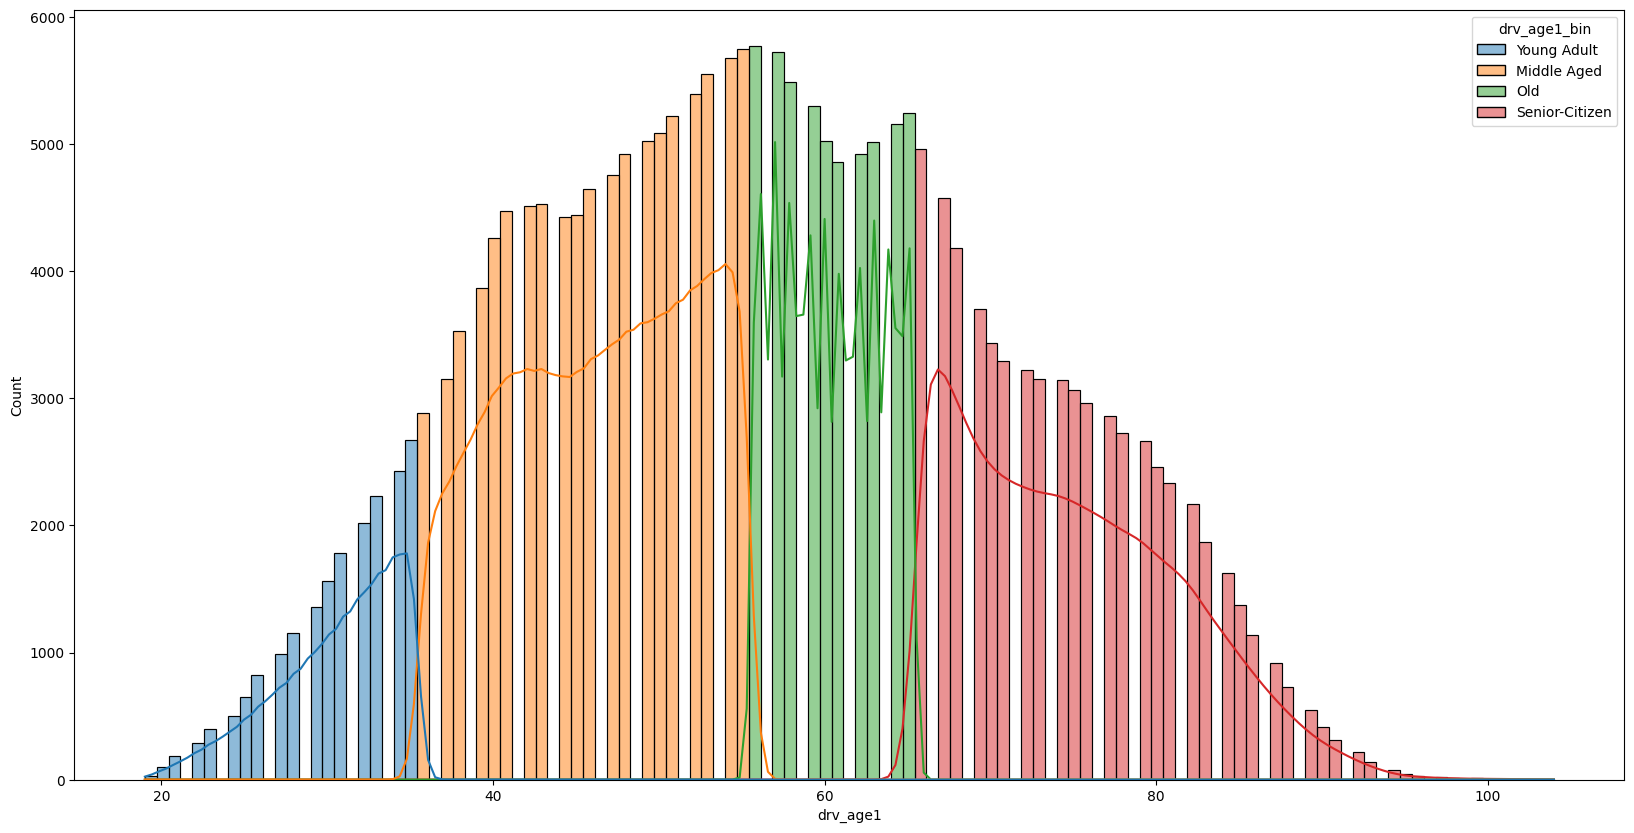

In [ ]:
sns.histplot(data=df,x='drv_age1',hue='drv_age1_bin',kde=True)

In [ ]:
# df['vh_age_bin']=pd.cut(df['vh_age'],bins=[0,15,65],labels=[0,1])
df['vh_age_bin']=pd.cut(df['vh_age'],bins=[0,15,65],labels=['Road worthy','Old Vehicle'])

<Axes: xlabel='vh_age', ylabel='Count'>

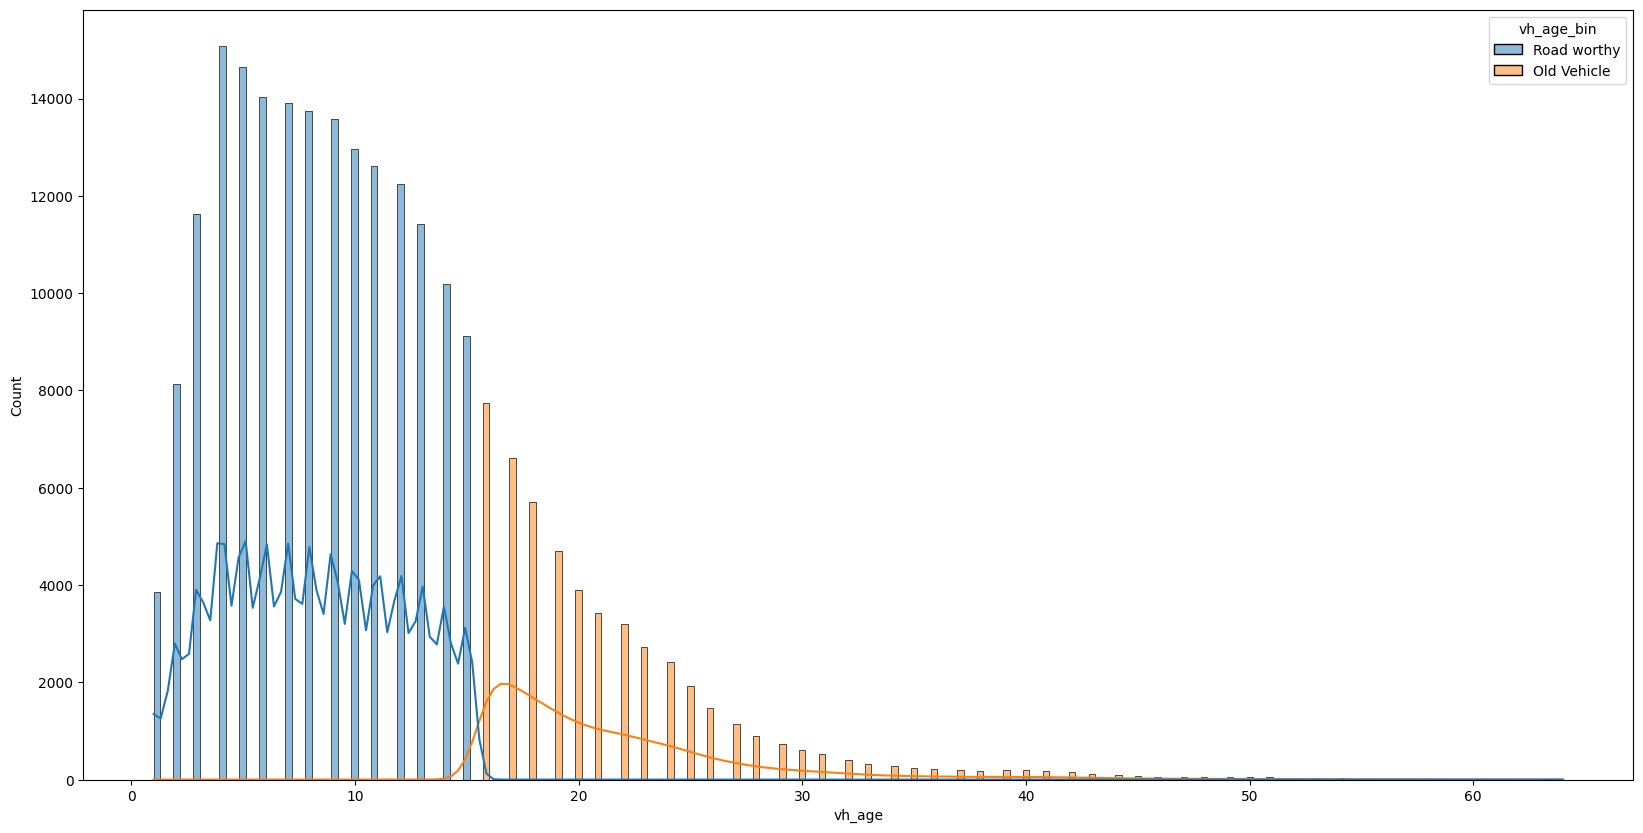

In [ ]:
sns.histplot(data=df,x='vh_age',hue='vh_age_bin',kde=True)

In [ ]:
df.drop(['vh_age','drv_age1','drv_sex2'],axis=1,inplace=True)

In [ ]:
df.head()

,id_policy,year,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,drv_sex1,drv_drv2,drv_age2,drv_age_lic2,vh_fuel,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,ncd_trend,vh_power_to_weight,pol_usage_vh_type,vh_make_model_encoded,drv_age1_bin,vh_age_bin
0,PL000000,1.0,Med2,5,1,Monthly,No,M,Yes,26.0,1.0,Gasoline,11040.0,0.0,0,38.36858,19.0,No history,0.152231,WorkPrivate_Tourism,0.015599,Young Adult,Road worthy
108697,PL000000,2.0,Med2,6,2,Monthly,No,M,Yes,27.0,2.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
131089,PL000000,3.0,Med2,7,3,Monthly,No,M,Yes,28.0,3.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
171371,PL000000,4.0,Med2,8,4,Monthly,No,M,Yes,29.0,4.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
54435,PL000001,1.0,Max,7,2,Yearly,No,F,No,-1.0,-1.0,Diesel,12820.0,0.0,0,0.57430,18.0,No history,0.175676,WorkPrivate_Tourism,0.073281,Middle Aged,Road worthy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228216 entries, 0 to 171402
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id_policy              228216 non-null  object  
 1   year                   228216 non-null  float64 
 2   pol_coverage           228216 non-null  object  
 3   pol_duration           228216 non-null  int64   
 4   pol_sit_duration       228216 non-null  int64   
 5   pol_pay_freq           228216 non-null  object  
 6   pol_payd               228216 non-null  object  
 7   drv_sex1               228216 non-null  object  
 8   drv_drv2               228216 non-null  object  
 9   drv_age2               228216 non-null  float64 
 10  drv_age_lic2           228216 non-null  float64 
 11  vh_fuel                228216 non-null  object  
 12  vh_value               228216 non-null  float64 
 13  claim_amount           228216 non-null  float64 
 14  claim_occurred         22

# Stats

In [ ]:
st = df.copy()

In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228216 entries, 0 to 171402
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id_policy              228216 non-null  object  
 1   year                   228216 non-null  float64 
 2   pol_coverage           228216 non-null  object  
 3   pol_duration           228216 non-null  int64   
 4   pol_sit_duration       228216 non-null  int64   
 5   pol_pay_freq           228216 non-null  object  
 6   pol_payd               228216 non-null  object  
 7   drv_sex1               228216 non-null  object  
 8   drv_drv2               228216 non-null  object  
 9   drv_age2               228216 non-null  float64 
 10  drv_age_lic2           228216 non-null  float64 
 11  vh_fuel                228216 non-null  object  
 12  vh_value               228216 non-null  float64 
 13  claim_amount           228216 non-null  float64 
 14  claim_occurred         22

In [ ]:
cat=st.drop('id_policy',axis=1).select_dtypes(exclude=np.number).columns.to_list()
cat

['pol_coverage',
 'pol_pay_freq',
 'pol_payd',
 'drv_sex1',
 'drv_drv2',
 'vh_fuel',
 'ncd_trend',
 'pol_usage_vh_type',
 'drv_age1_bin',
 'vh_age_bin']

In [ ]:
def onway_anova(column_name):
  dff=[]
  for i in list(st[column_name].unique()):
    i=st[st[column_name]==i]['claim_amount']
    dff.append(i)
  d={k:v for k,v in zip(list(st[column_name].unique()),dff)}
  f_stat,p_val=f_oneway(*dff)
  if p_val > 0.05:
    print(f"Fail to reject null hypothesis: There is no relation between {column_name} and claim amount")
  else:
    print(f"Reject null hypothesis: There is relation between {column_name} and claim_amount")
  return p_val

In [ ]:
for i in cat:
  print(onway_anova(i))

Reject null hypothesis: There is relation between pol_coverage and claim_amount
2.0222310989942846e-232
Reject null hypothesis: There is relation between pol_pay_freq and claim_amount
2.178843578793446e-07
Reject null hypothesis: There is relation between pol_payd and claim_amount
4.576402900363054e-06
Reject null hypothesis: There is relation between drv_sex1 and claim_amount
0.040911908755012404
Reject null hypothesis: There is relation between drv_drv2 and claim_amount
1.3236109832330227e-05
Reject null hypothesis: There is relation between vh_fuel and claim_amount
2.429447439801957e-37
Reject null hypothesis: There is relation between ncd_trend and claim_amount
3.8181786039904894e-22
Reject null hypothesis: There is relation between pol_usage_vh_type and claim_amount
4.546971037690919e-46
Reject null hypothesis: There is relation between drv_age1_bin and claim_amount
0.04509696439708015
Reject null hypothesis: There is relation between vh_age_bin and claim_amount
6.106460938454106e

In [ ]:
from scipy import stats

def kruskal_wallis(column_name):
  groups = [df[df[column_name] == category]['claim_amount'] for category in df[column_name].unique()]
  H, p_val = stats.kruskal(*groups)

  if p_val > 0.05:
    print(f"Fail to reject null hypothesis: There is no significant difference in claim amount across categories of {column_name}")
  else:
    print(f"Reject null hypothesis: There is a significant difference in claim amount across categories of {column_name}")
  return p_val

# Assuming 'cat' contains the list of categorical columns and 'df' is your DataFrame
for col in cat:
  print(f"\nKruskal-Wallis test for {col} vs claim_amount:")
  print(kruskal_wallis(col))


Kruskal-Wallis test for pol_coverage vs claim_amount:
Reject null hypothesis: There is a significant difference in claim amount across categories of pol_coverage
0.0

Kruskal-Wallis test for pol_pay_freq vs claim_amount:
Reject null hypothesis: There is a significant difference in claim amount across categories of pol_pay_freq
1.1551524401937143e-23

Kruskal-Wallis test for pol_payd vs claim_amount:
Reject null hypothesis: There is a significant difference in claim amount across categories of pol_payd
1.3035085108696026e-18

Kruskal-Wallis test for drv_sex1 vs claim_amount:
Reject null hypothesis: There is a significant difference in claim amount across categories of drv_sex1
0.01859574676791567

Kruskal-Wallis test for drv_drv2 vs claim_amount:
Reject null hypothesis: There is a significant difference in claim amount across categories of drv_drv2
5.8100653320770885e-25

Kruskal-Wallis test for vh_fuel vs claim_amount:
Reject null hypothesis: There is a significant difference in claim

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(column_name):
  # Create a contingency table
  contingency_table = pd.crosstab(df[column_name], df['claim_occurred'])

  # Perform the Chi-Square test
  chi2, p_val, dof, expected = chi2_contingency(contingency_table)

  if p_val > 0.05:
    print(f"Fail to reject null hypothesis: There is no significant association between {column_name} and claim_occurred")
  else:
    print(f"Reject null hypothesis: There is a significant association between {column_name} and claim_occurred")
  return p_val

# Assuming 'cat' contains the list of categorical columns and 'df' is your DataFrame
# Exclude 'id_policy' as it's a unique identifier
categorical_cols_for_chi2 = [col for col in cat if col != 'id_policy']

for col in categorical_cols_for_chi2:
  print(f"\nChi-Square test for {col} vs claim_occurred:")
  print(chi_square_test(col))


Chi-Square test for pol_coverage vs claim_occurred:
Reject null hypothesis: There is a significant association between pol_coverage and claim_occurred
0.0

Chi-Square test for pol_pay_freq vs claim_occurred:
Reject null hypothesis: There is a significant association between pol_pay_freq and claim_occurred
1.0410955326909833e-24

Chi-Square test for pol_payd vs claim_occurred:
Reject null hypothesis: There is a significant association between pol_payd and claim_occurred
5.978289418874671e-19

Chi-Square test for drv_sex1 vs claim_occurred:
Reject null hypothesis: There is a significant association between drv_sex1 and claim_occurred
0.01929964498834332

Chi-Square test for drv_drv2 vs claim_occurred:
Reject null hypothesis: There is a significant association between drv_drv2 and claim_occurred
2.1214813188923657e-25

Chi-Square test for vh_fuel vs claim_occurred:
Reject null hypothesis: There is a significant association between vh_fuel and claim_occurred
4.087996686012493e-220

Chi-Sq

# Cluster

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228216 entries, 0 to 171402
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id_policy              228216 non-null  object  
 1   year                   228216 non-null  float64 
 2   pol_coverage           228216 non-null  object  
 3   pol_duration           228216 non-null  int64   
 4   pol_sit_duration       228216 non-null  int64   
 5   pol_pay_freq           228216 non-null  object  
 6   pol_payd               228216 non-null  object  
 7   drv_sex1               228216 non-null  object  
 8   drv_drv2               228216 non-null  object  
 9   drv_age2               228216 non-null  float64 
 10  drv_age_lic2           228216 non-null  float64 
 11  vh_fuel                228216 non-null  object  
 12  vh_value               228216 non-null  float64 
 13  claim_amount           228216 non-null  float64 
 14  claim_occurred         22

In [ ]:
c= df.copy()

In [ ]:
c

,id_policy,year,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,drv_sex1,drv_drv2,drv_age2,drv_age_lic2,vh_fuel,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,ncd_trend,vh_power_to_weight,pol_usage_vh_type,vh_make_model_encoded,drv_age1_bin,vh_age_bin
0,PL000000,1.0,Med2,5,1,Monthly,No,M,Yes,26.0,1.0,Gasoline,11040.0,0.00,0,38.368580,19.0,No history,0.152231,WorkPrivate_Tourism,64.204323,Young Adult,Road worthy
108697,PL000000,2.0,Med2,6,2,Monthly,No,M,Yes,27.0,2.0,Gasoline,11040.0,0.00,0,38.368580,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,Middle Aged,Road worthy
131089,PL000000,3.0,Med2,7,3,Monthly,No,M,Yes,28.0,3.0,Gasoline,11040.0,0.00,0,38.368580,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,Middle Aged,Road worthy
171371,PL000000,4.0,Med2,8,4,Monthly,No,M,Yes,29.0,4.0,Gasoline,11040.0,0.00,0,38.368580,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,Middle Aged,Road worthy
54435,PL000001,1.0,Max,7,2,Yearly,No,F,No,-1.0,-1.0,Diesel,12820.0,0.00,0,0.574300,18.0,No history,0.175676,WorkPrivate_Tourism,101.713880,Middle Aged,Road worthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171312,PL095634,4.0,Max,10,10,Monthly,No,M,Yes,44.0,19.0,Gasoline,12820.0,56.38,1,6.785714,21.0,No Change,0.175676,WorkPrivate_Tourism,101.713880,Middle Aged,Road worthy
31737,PL095635,1.0,Med1,2,2,Yearly,No,M,No,-1.0,-1.0,Diesel,22538.0,0.00,0,3.099440,20.0,No history,0.091061,Retired_Tourism,95.000899,Senior-Citizen,Old Vehicle
108686,PL095635,2.0,Med1,3,3,Yearly,No,M,No,-1.0,-1.0,Diesel,22538.0,0.00,0,3.099440,20.0,No Change,0.091061,Retired_Tourism,95.000899,Senior-Citizen,Old Vehicle
131092,PL095635,3.0,Med1,4,4,Yearly,No,M,No,-1.0,-1.0,Diesel,22538.0,0.00,0,3.099440,20.0,No Change,0.091061,Retired_Tourism,95.000899,Senior-Citizen,Old Vehicle


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming 'c' is the DataFrame to be used for clustering
# We will use the same column groups as defined for K-Means clustering

policy_cols = {
    'numerical': ['year', 'pol_duration', 'pol_sit_duration'], # Added 'year'
    'categorical': ['pol_coverage', 'pol_pay_freq', 'pol_payd', 'ncd_trend', 'pol_usage_vh_type']
}

customer_cols = {
    # Removed 'drv1_exp_binned' and 'drv_sex2', added 'drv1_exp'
    'numerical': ['drv_age2', 'drv_age_lic2', 'pop_den', 'drv1_exp'],
    'categorical': ['drv_sex1', 'drv_drv2','drv_age1_bin']
}

vehicle_cols = {
    # Removed 'vh_make_model', added 'vh_value', 'vh_age', 'vh_power_to_weight'
    'numerical': ['vh_value', 'vh_power_to_weight','vh_make_model_encoded'],
    'categorical': ['vh_fuel','vh_age_bin']
}

# Include the target encoded vehicle make/model if it exists
if 'vh_make_model_encoded' in c.columns:
     vehicle_cols['numerical'].append('vh_make_model_encoded')


# Dictionary to hold cluster details
cluster_groups = {
    'policy': policy_cols,
    'customer': customer_cols,
    'vehicle': vehicle_cols
}

# --- Perform Hierarchical Clustering ---
# Note: For large datasets, generating dendrograms for visualization can be computationally expensive.
# We will perform the clustering and then discuss methods to determine the number of clusters or analyze results.

for name, cols in cluster_groups.items():
    print(f"--- Performing Hierarchical Clustering for {name} details ---")

    # Combine numerical and categorical columns for the current group
    all_cols_for_group = cols['numerical'] + cols['categorical']

    # Check if all columns exist in the DataFrame before proceeding
    missing_cols = [col for col in all_cols_for_group if col not in c.columns]
    if missing_cols:
        print(f"Skipping hierarchical clustering for '{name}' due to missing columns: {missing_cols}")
        continue

    # Define the preprocessor for the current column group
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), cols['numerical']),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols['categorical'])
        ],
        remainder='passthrough' # Keep other columns
    )

    # Apply preprocessing
    X_processed = preprocessor.fit_transform(c[all_cols_for_group])

    # Perform Agglomerative Clustering
    # We are not specifying n_clusters here initially to explore dendrograms or other methods
    # You would typically analyze dendrograms or use metrics to choose the number of clusters later.
    # For demonstration, let's set a placeholder n_clusters. You'll likely want to adjust this
    # after analyzing the clustering structure (e.g., using a dendrogram on a subset or other metrics).
    # Setting a small number for demonstration purposes.
    n_clusters_chosen = 3 # Placeholder - determine this based on analysis

    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_chosen)
    cluster_label_col = f'{name}_hierarchical_cluster'
    c[cluster_label_col] = hierarchical_cluster.fit_predict(X_processed)
    print(f"Added '{cluster_label_col}' to the DataFrame.")

display(c.head())

--- Performing Hierarchical Clustering for policy details ---


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'c' is the DataFrame to be used for clustering
# Let's inspect the current columns in 'c' to update the column lists
# print(c.info())
# print(c.columns)


# Define column groups based on the current DataFrame columns
# Adjust these lists based on the output of c.info() and c.columns
policy_cols = {
    'numerical': ['year', 'pol_duration', 'pol_sit_duration'], # Added 'year'
    'categorical': ['pol_coverage', 'pol_pay_freq', 'pol_payd', 'ncd_trend', 'pol_usage_vh_type']
}

customer_cols = {
    # Removed 'drv1_exp_binned' and 'drv_sex2', added 'drv1_exp'
    'numerical': ['drv_age1', 'drv_age2', 'drv_age_lic2', 'pop_den', 'drv1_exp'],
    'categorical': ['drv_sex1', 'drv_drv2']
}

vehicle_cols = {
    # Removed 'vh_make_model', added 'vh_value', 'vh_age', 'vh_power_to_weight'
    'numerical': ['vh_age', 'vh_value', 'vh_power_to_weight'],
    'categorical': ['vh_fuel']
}

# Add a target encoder for the high cardinality vehicle make/model
# This step might need adjustment based on whether vh_make_model is still in the df or encoded already
# Since vh_make_model is still in 'c' based on the previous info() output, let's target encode it here.
if 'vh_make_model' in c.columns:
    encoder = TargetEncoder(cols=['vh_make_model'])
    # Make sure 'claim_amount' is available for target encoding
    if 'claim_amount' in c.columns:
        c['vh_make_model_encoded'] = encoder.fit_transform(c['vh_make_model'], c['claim_amount'])
        vehicle_cols['numerical'].append('vh_make_model_encoded')
        c.drop(columns=['vh_make_model'], inplace=True)
    else:
        print("Warning: 'claim_amount' not found in DataFrame, cannot target encode 'vh_make_model'.")
        # Decide how to handle vh_make_model if target encoding is not possible (e.g., one-hot encode if cardinality is manageable or drop)
        # For now, let's remove it from categorical if it can't be encoded numerically for clustering
        # vehicle_cols['categorical'].append('vh_make_model') # Or handle differently


# Dictionary to hold cluster details
cluster_groups = {
    'policy': policy_cols,
    'customer': customer_cols,
    'vehicle': vehicle_cols
}

# --- Find Optimal Number of Clusters using Elbow Method ---
# inertia = {}
# for name, cols in cluster_groups.items():
#     print(f"--- Finding optimal clusters for {name} details ---")

#     # Combine numerical and categorical columns for the current group
#     all_cols_for_group = cols['numerical'] + cols['categorical']

#     # Check if all columns exist in the DataFrame before proceeding
#     missing_cols = [col for col in all_cols_for_group if col not in c.columns]
#     if missing_cols:
#         print(f"Skipping elbow method for '{name}' due to missing columns: {missing_cols}")
#         continue

#     # Define the preprocessor for the current column group
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', StandardScaler(), cols['numerical']),
#             ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols['categorical'])
#         ],
#         remainder='passthrough' # Keep other columns
#     )

#     # Apply preprocessing
#     X_processed = preprocessor.fit_transform(c[all_cols_for_group])

    # Calculate inertia for different numbers of clusters
    # inertia[name] = []
    # range_n_clusters = range(1, 11) # Test from 1 to 10 clusters
    # for n_clusters in range_n_clusters:
    #     kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    #     kmeans.fit(X_processed)
    #     inertia[name].append(kmeans.inertia_)

    # # Plot the elbow method graph
    # plt.figure(figsize=(8, 4))
    # plt.plot(range_n_clusters, inertia[name], marker='o')
    # plt.title(f'Elbow Method for {name} Details')
    # plt.xlabel('Number of Clusters')
    # plt.ylabel('Inertia')
    # plt.xticks(range_n_clusters)
    # plt.grid(True)
    # plt.show()

# --- Create Clusters with chosen optimal numbers (Manual Step after reviewing plots) ---
# You will need to manually determine the optimal number of clusters for each group
# by looking at the plots generated above and then run the clustering again with those numbers.
# For now, I'll keep the original clustering code commented out.

for name, cols in cluster_groups.items():
    print(f"--- Clustering for {name} details with optimal clusters ---")

    # Combine numerical and categorical columns for the current group
    all_cols_for_group = cols['numerical'] + cols['categorical']

    # Check if all columns exist in the DataFrame before proceeding
    missing_cols = [col for col in all_cols_for_group if col not in c.columns]
    if missing_cols:
        print(f"Skipping clustering for '{name}' due to missing columns: {missing_cols}")
        continue


    # Define the preprocessor for the current column group
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), cols['numerical']),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols['categorical'])
        ],
        remainder='passthrough' # Keep other columns
    )

    # Determine the optimal number of clusters based on the elbow method plots (replace with chosen numbers)
    # For example:
    if name == 'policy':
        optimal_n_clusters = 3 # Example based on a hypothetical elbow plot
    elif name == 'customer':
        optimal_n_clusters = 3 # Example
    elif name == 'vehicle':
        optimal_n_clusters = 3 # Example

    # Create the clustering pipeline with the determined optimal number
    cluster_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10))
    ])
    cluster_label_col = f'{name}_cluster'
    c[cluster_label_col] = cluster_pipeline.fit_predict(c[all_cols_for_group])
    print(f"Added '{cluster_label_col}' to the DataFrame.")

display(c.head())

--- Clustering for policy details with optimal clusters ---
Added 'policy_cluster' to the DataFrame.
--- Clustering for customer details with optimal clusters ---
Added 'customer_cluster' to the DataFrame.
--- Clustering for vehicle details with optimal clusters ---
Added 'vehicle_cluster' to the DataFrame.


,id_policy,year,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,drv_sex1,drv_age1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_age,vh_fuel,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,ncd_trend,vh_power_to_weight,pol_usage_vh_type,vh_make_model_encoded,policy_cluster,customer_cluster,vehicle_cluster
0,PL000000,1.0,Med2,5,1,Monthly,No,M,35.0,Yes,F,26.0,1.0,8.0,Gasoline,11040.0,0.0,0,38.36858,19.0,No history,0.152231,WorkPrivate_Tourism,64.204323,2,1,1
108697,PL000000,2.0,Med2,6,2,Monthly,No,M,36.0,Yes,F,27.0,2.0,9.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,0,1,1
131089,PL000000,3.0,Med2,7,3,Monthly,No,M,37.0,Yes,F,28.0,3.0,10.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,0,1,1
171371,PL000000,4.0,Med2,8,4,Monthly,No,M,38.0,Yes,F,29.0,4.0,11.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,64.204323,0,1,0
54435,PL000001,1.0,Max,7,2,Yearly,No,F,46.0,No,0,-1.0,-1.0,12.0,Diesel,12820.0,0.0,0,0.57430,18.0,No history,0.175676,WorkPrivate_Tourism,101.713880,2,1,1


In [ ]:
c.columns

Index(['id_policy', 'year', 'pol_coverage', 'pol_duration', 'pol_sit_duration',
       'pol_pay_freq', 'pol_payd', 'drv_sex1', 'drv_age1', 'drv_drv2',
       'drv_sex2', 'drv_age2', 'drv_age_lic2', 'vh_age', 'vh_fuel', 'vh_value',
       'claim_amount', 'claim_occurred', 'pop_den', 'drv1_exp', 'ncd_trend',
       'vh_power_to_weight', 'pol_usage_vh_type', 'vh_make_model_encoded',
       'policy_cluster', 'customer_cluster', 'vehicle_cluster'],
      dtype='object')

In [ ]:
df[['policy_cluster', 'customer_cluster', 'vehicle_cluster']]=c[['policy_cluster', 'customer_cluster', 'vehicle_cluster']]

In [ ]:
df.head()

,id_policy,year,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,drv_sex1,drv_age1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,ncd_trend,vh_power_to_weight,pol_usage_vh_type,policy_cluster,customer_cluster,vehicle_cluster
0,PL000000,1.0,Med2,5,1,Monthly,No,M,35.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,11040.0,0.0,0,38.36858,19.0,No history,0.152231,WorkPrivate_Tourism,2,1,1
108697,PL000000,2.0,Med2,6,2,Monthly,No,M,36.0,Yes,F,27.0,2.0,aparvvfowrjncdhp,9.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0,1,1
131089,PL000000,3.0,Med2,7,3,Monthly,No,M,37.0,Yes,F,28.0,3.0,aparvvfowrjncdhp,10.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0,1,1
171371,PL000000,4.0,Med2,8,4,Monthly,No,M,38.0,Yes,F,29.0,4.0,aparvvfowrjncdhp,11.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0,1,0
54435,PL000001,1.0,Max,7,2,Yearly,No,F,46.0,No,0,-1.0,-1.0,rthsjeyjgdlmkygk,12.0,Diesel,12820.0,0.0,0,0.57430,18.0,No history,0.175676,WorkPrivate_Tourism,2,1,1


# Encoding

In [ ]:
df.head()

,id_policy,year,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,drv_sex1,drv_drv2,drv_age2,drv_age_lic2,vh_fuel,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,ncd_trend,vh_power_to_weight,pol_usage_vh_type,vh_make_model_encoded,drv_age1_bin,vh_age_bin
0,PL000000,1.0,Med2,5,1,Monthly,No,M,Yes,26.0,1.0,Gasoline,11040.0,0.0,0,38.36858,19.0,No history,0.152231,WorkPrivate_Tourism,0.015599,Young Adult,Road worthy
108697,PL000000,2.0,Med2,6,2,Monthly,No,M,Yes,27.0,2.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
131089,PL000000,3.0,Med2,7,3,Monthly,No,M,Yes,28.0,3.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
171371,PL000000,4.0,Med2,8,4,Monthly,No,M,Yes,29.0,4.0,Gasoline,11040.0,0.0,0,38.36858,19.0,Decreased,0.152231,WorkPrivate_Tourism,0.015599,Middle Aged,Road worthy
54435,PL000001,1.0,Max,7,2,Yearly,No,F,No,-1.0,-1.0,Diesel,12820.0,0.0,0,0.57430,18.0,No history,0.175676,WorkPrivate_Tourism,0.073281,Middle Aged,Road worthy


In [ ]:
cat=df.select_dtypes(exclude=np.number).columns.to_list()
df[cat].apply(lambda x: x.unique())

,0
id_policy,"[PL000000, PL000001, PL000003, PL000005, PL000..."
pol_coverage,"[Med2, Max, Min, Med1]"
pol_pay_freq,"[Monthly, Yearly, Biannual, Quarterly]"
pol_payd,"[No, Yes]"
drv_sex1,"[M, F]"
drv_drv2,"[Yes, No]"
vh_fuel,"[Gasoline, Diesel, Hybrid]"
ncd_trend,"[No history, Decreased, No Change, Increased]"
pol_usage_vh_type,"[WorkPrivate_Tourism, Professional_Tourism, Re..."
drv_age1_bin,"['Young Adult', 'Middle Aged', 'Old', 'Senior-..."


In [ ]:
df[cat].apply(lambda x: x.nunique())

,0
id_policy,57054
pol_coverage,4
pol_pay_freq,4
pol_payd,2
drv_sex1,2
drv_drv2,2
vh_fuel,3
ncd_trend,4
pol_usage_vh_type,8
drv_age1_bin,4


In [ ]:
cols= [ x for x in cat if x not in ['id_policy']]
df = pd.get_dummies(df,columns=cols,drop_first=True,dtype=int)
df.head()

,id_policy,year,pol_duration,pol_sit_duration,drv_age2,drv_age_lic2,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,vh_power_to_weight,vh_make_model_encoded,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_Yes,drv_sex1_M,drv_drv2_Yes,vh_fuel_Gasoline,vh_fuel_Hybrid,ncd_trend_Increased,ncd_trend_No Change,ncd_trend_No history,pol_usage_vh_type_AllTrips_Tourism,pol_usage_vh_type_Professional_Commercial,pol_usage_vh_type_Professional_Tourism,pol_usage_vh_type_Retired_Commercial,pol_usage_vh_type_Retired_Tourism,pol_usage_vh_type_WorkPrivate_Commercial,pol_usage_vh_type_WorkPrivate_Tourism,drv_age1_bin_Middle Aged,drv_age1_bin_Old,drv_age1_bin_Senior-Citizen,vh_age_bin_Old Vehicle
0,PL000000,1.0,5,1,26.0,1.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
108697,PL000000,2.0,6,2,27.0,2.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
131089,PL000000,3.0,7,3,28.0,3.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
171371,PL000000,4.0,8,4,29.0,4.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
54435,PL000001,1.0,7,2,-1.0,-1.0,12820.0,0.0,0,0.57430,18.0,0.175676,0.073281,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
df.shape

(228216, 38)

In [ ]:
df.head()

,id_policy,year,pol_duration,pol_sit_duration,drv_age2,drv_age_lic2,vh_value,claim_amount,claim_occurred,pop_den,drv1_exp,vh_power_to_weight,vh_make_model_encoded,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_Yes,drv_sex1_M,drv_drv2_Yes,vh_fuel_Gasoline,vh_fuel_Hybrid,ncd_trend_Increased,ncd_trend_No Change,ncd_trend_No history,pol_usage_vh_type_AllTrips_Tourism,pol_usage_vh_type_Professional_Commercial,pol_usage_vh_type_Professional_Tourism,pol_usage_vh_type_Retired_Commercial,pol_usage_vh_type_Retired_Tourism,pol_usage_vh_type_WorkPrivate_Commercial,pol_usage_vh_type_WorkPrivate_Tourism,drv_age1_bin_Middle Aged,drv_age1_bin_Old,drv_age1_bin_Senior-Citizen,vh_age_bin_Old Vehicle
0,PL000000,1.0,5,1,26.0,1.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
108697,PL000000,2.0,6,2,27.0,2.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
131089,PL000000,3.0,7,3,28.0,3.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
171371,PL000000,4.0,8,4,29.0,4.0,11040.0,0.0,0,38.36858,19.0,0.152231,0.015599,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
54435,PL000001,1.0,7,2,-1.0,-1.0,12820.0,0.0,0,0.57430,18.0,0.175676,0.073281,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228216 entries, 0 to 171402
Data columns (total 38 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   id_policy                                  228216 non-null  object 
 1   year                                       228216 non-null  float64
 2   pol_duration                               228216 non-null  int64  
 3   pol_sit_duration                           228216 non-null  int64  
 4   drv_age2                                   228216 non-null  float64
 5   drv_age_lic2                               228216 non-null  float64
 6   vh_value                                   228216 non-null  float64
 7   claim_amount                               228216 non-null  float64
 8   claim_occurred                             228216 non-null  int64  
 9   pop_den                                    228216 non-null  float64
 10  drv1_exp     

# Multicollinearity

In [ ]:
def vif_fn(d):
  vif = pd.DataFrame()
  vif['variables'] = d.columns
  vif['VIF'] = [variance_inflation_factor(d.values,i) for i in range(d.shape[1])]
  vif = vif.sort_values(by='VIF',ascending=False)
  return vif

In [ ]:
# df_vif=df.drop(['claim_amount','claim_occurred','id_policy'],axis=1)
# vif_fn(df_vif)

In [ ]:
# dropped =['drv_age2']
# df_vif = df_vif.drop('drv_age2',axis=1)
# vif_fn(df_vif)

In [ ]:
# dfm = df.drop(['drv_age_lic1','vh_speed','pol_usage_WorkPrivate'],axis=1)
# dfm.head()

# Model building

## SMOTE

In [ ]:
def smote(x,y):
  s = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = s.fit_resample(x, y)

  # print(f"Before SMOTE:\n{y.value_counts()}")
  # print(f"After SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")
  return X_train_resampled, y_train_resampled

### TRAIN TEST SPLIT

In [ ]:
x=df.drop(['claim_amount','claim_occurred','id_policy'],axis=1)
y=df['claim_occurred']

In [ ]:
# x=df[['policy_cluster', 'customer_cluster', 'vehicle_cluster']]
# y=df['claim_occurred']
temp= df[df['claim_occurred']==1]
x=temp.drop(['claim_amount','claim_occurred','id_policy'],axis=1)
y=temp['claim_amount']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify= y)
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

## OLS


In [ ]:
def ols(xtrain,ytrain,xtest,ytest):

  # sc = StandardScaler()
  # xtrain_sc = sc.fit_transform(xtrain)
  # xtest_sc=sc.transform(xtest)
  # xtrain_sc = pd.DataFrame(xtrain,columns=xtrain.columns)
  # xtest_sc = pd.DataFrame(xtest,columns=xtest.columns)

  xtrain = sma.add_constant(xtrain)
  xtest = sma.add_constant(xtest)
  model = sma.OLS(ytrain,xtrain).fit()
  print(model.summary())
  return 1

In [ ]:
ols(xtrain,ytrain,xtest,ytest)

                            OLS Regression Results                            
Dep. Variable:           claim_amount   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     13.10
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           4.37e-74
Time:                        03:47:09   Log-Likelihood:            -1.4184e+05
No. Observations:               16304   AIC:                         2.838e+05
Df Residuals:                   16268   BIC:                         2.840e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

1

## Logit

In [ ]:
def logit(xtrain,ytrain,xtest,ytest):
  xtrain,ytrain = smote(xtrain,ytrain)

  xtrain = sma.add_constant(xtrain)
  xtest = sma.add_constant(xtest)

  model = sma.Logit(ytrain,xtrain).fit()
  print(model.summary())
  return model

In [ ]:
logit(xtrain,ytrain,xtest,ytest)

Optimization terminated successfully.
         Current function value: 0.366190
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:         claim_occurred   No. Observations:               286894
Model:                          Logit   Df Residuals:                   286858
Method:                           MLE   Df Model:                           35
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                  0.4717
Time:                        04:18:59   Log-Likelihood:            -1.0506e+05
converged:                       True   LL-Null:                   -1.9886e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        

In [ ]:
xtrain.shape

(159751, 35)

## Logistic

In [ ]:
def logistic(xtrain,ytrain,xtest,ytest):
  xtrain,ytrain = smote(xtrain,ytrain)

  # l=LogisticRegression(random_state=10,class_weight='balanced')
  l=LogisticRegression(random_state=10) # use this while using smote

  l.fit(xtrain,ytrain)
  ypred_test = l.predict(xtest)
  ypred_train= l.predict(xtrain)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return l

In [ ]:
logistic(xtrain,ytrain,xtest,ytest)

*************Train data results************
              precision    recall  f1-score   support

           0       0.63      0.61      0.62    143447
           1       0.62      0.64      0.63    143447

    accuracy                           0.63    286894
   macro avg       0.63      0.63      0.63    286894
weighted avg       0.63      0.63      0.63    286894

*************Test data results************
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     61477
           1       0.13      0.49      0.20      6988

    accuracy                           0.60     68465
   macro avg       0.52      0.55      0.47     68465
weighted avg       0.83      0.60      0.68     68465



LogisticRegression(random_state=10)

In [ ]:
xtrain.shape

(159751, 35)

## Random Forest

In [ ]:
def random_forest(xtrain,ytrain,xtest,ytest):

  xtrain,ytrain = smote(xtrain,ytrain)
  rf = RandomForestClassifier(max_depth=5,n_estimators=9,random_state=10,class_weight={0:1,1:1.2})
  rf.fit(xtrain,ytrain)
  ypred_test = rf.predict(xtest)
  ypred_train= rf.predict(xtrain)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return rf

In [ ]:
random_forest(xtrain,ytrain,xtest,ytest)

*************Train data results************
              precision    recall  f1-score   support

           0       0.84      0.67      0.74    143447
           1       0.72      0.87      0.79    143447

    accuracy                           0.77    286894
   macro avg       0.78      0.77      0.77    286894
weighted avg       0.78      0.77      0.77    286894

*************Test data results************
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     61477
           1       0.14      0.48      0.22      6988

    accuracy                           0.65     68465
   macro avg       0.53      0.57      0.49     68465
weighted avg       0.84      0.65      0.71     68465



RandomForestClassifier(class_weight={0: 1, 1: 1.2}, max_depth=5, n_estimators=9,
                       random_state=10)

### RandomSearch

In [ ]:
def rand_search(xtrain,ytrain,xtest,ytest):
  xtrain,ytrain = smote(xtrain,ytrain)

  rf = RandomForestClassifier( random_state=10,class_weight={0:1,1:1.2})
  # class_weight='balanced',
  # Define search space
  param_dist = {
      'n_estimators': stats.randint(2, 10),
      'max_depth': stats.randint(2, 6)
      # 'min_samples_split': stats.randint(2, 5),
      # 'min_samples_leaf': stats.randint(1, 5)
  }

  # Set up randomized search
  random_search = RandomizedSearchCV(
      estimator=rf,
      param_distributions=param_dist,
      n_iter=20,     # Try only 20 combinations
      cv=2,
      scoring='recall',
      random_state=42,
      verbose=2
      # n_jobs=-1
  )

  random_search.fit(xtrain, ytrain)
  print(random_search.best_params_)
  print('Best score:',random_search.best_score_)
  return 1
rand_search(xtrain, ytrain, xtest, ytest)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.6s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.7s
[CV] END ........................max_depth=2, n_estimators=8; total time=   0.7s
[CV] END ........................max_depth=2, n_estimators=8; total time=   1.2s
[CV] END ........................max_depth=4, n_estimators=9; total time=   1.7s
[CV] END ........................max_depth=4, n_estimators=9; total time=   1.4s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.7s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.4s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.5s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.4s
[CV] END ........................max_depth=4, n_estimators=8; total time=   0.8s
[CV] END ........................max_depth=4, n_

1

In [ ]:
# Calculate value counts for ytrain
train_counts = ytrain.value_counts()

# Calculate scale_pos_weight
scale_pos_weight_calculated = train_counts[0] / train_counts[1]

print(f"Value counts for ytrain:\n{train_counts}")
print(f"Calculated scale_pos_weight: {scale_pos_weight_calculated}")

Value counts for ytrain:
claim_occurred
0    143447
1     16304
Name: count, dtype: int64
Calculated scale_pos_weight: 8.79827036310108


# XGBoost

In [ ]:
from xgboost import XGBClassifier
def xg(xtrain,ytrain,xtest,ytest):
  # xtrain,ytrain = smote(xtrain,ytrain)
  xgb = XGBClassifier(scale_pos_weight=scale_pos_weight_calculated)
  xgb.fit(xtrain, ytrain)
  ypred_test = xgb.predict(xtest)
  ypred_train= xgb.predict(xtrain)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return xgb
xg(xtrain,ytrain,xtest,ytest)

*************Train data results************
              precision    recall  f1-score   support

           0       0.96      0.60      0.74    143447
           1       0.19      0.79      0.30     16304

    accuracy                           0.62    159751
   macro avg       0.57      0.70      0.52    159751
weighted avg       0.88      0.62      0.70    159751

*************Test data results************
              precision    recall  f1-score   support

           0       0.93      0.58      0.72     61477
           1       0.14      0.59      0.22      6988

    accuracy                           0.59     68465
   macro avg       0.53      0.59      0.47     68465
weighted avg       0.85      0.59      0.67     68465



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 9,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Adaboost

In [ ]:
def adaboost_model(xtrain,ytrain,xtest,ytest):
  # You might consider using SMOTE or class_weight here depending on your strategy
  xtrain,ytrain = smote(xtrain,ytrain) # Uncomment if you want to use SMOTE with Adaboost

  adaboost = AdaBoostClassifier(random_state=10) # Add class_weight if not using SMOTE
  adaboost.fit(xtrain,ytrain)
  ypred_test = adaboost.predict(xtest)
  ypred_train= adaboost.predict(xtrain)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return adaboost
adaboost_model(xtrain,ytrain,xtest,ytest)

*************Train data results************
              precision    recall  f1-score   support

           0       0.85      0.81      0.83    143447
           1       0.82      0.86      0.84    143447

    accuracy                           0.83    286894
   macro avg       0.84      0.83      0.83    286894
weighted avg       0.84      0.83      0.83    286894

*************Test data results************
              precision    recall  f1-score   support

           0       0.91      0.81      0.85     61477
           1       0.14      0.27      0.18      6988

    accuracy                           0.75     68465
   macro avg       0.52      0.54      0.52     68465
weighted avg       0.83      0.75      0.79     68465



AdaBoostClassifier(random_state=10)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

def adaboost_random_search(xtrain, ytrain, xtest, ytest):
  # You might consider using SMOTE here if not using class_weight in the model
  xtrain, ytrain = smote(xtrain, ytrain)

  adaboost = AdaBoostClassifier(random_state=10)

  # Define the parameter distribution for RandomizedSearchCV
  param_dist = {
      'n_estimators': stats.randint(50, 200),  # Number of boosting rounds
      'learning_rate': uniform(0.01, 1.0)     # Step size shrinkage
  }

  # Set up RandomizedSearchCV
  random_search = RandomizedSearchCV(
      estimator=adaboost,
      param_distributions=param_dist,
      n_iter=20,  # Number of parameter settings that are sampled
      cv=3,       # Cross-validation folds
      scoring='recall', # Or any other relevant scoring metric
      random_state=42,
      verbose=2,
      n_jobs=-1   # Use all available cores
  )

  random_search.fit(xtrain, ytrain)

  print("Best parameters found by RandomizedSearchCV:")
  print(random_search.best_params_)
  print("\nBest recall score on cross-validation:")
  print(random_search.best_score_)

  # Evaluate on the test set with the best estimator
  best_adaboost = random_search.best_estimator_
  ypred_test = best_adaboost.predict(xtest)
  print('\n*************Test data results with best estimator************')
  print(classification_report(ytest, ypred_test))

  return best_adaboost

# Run the randomized search
adaboost_random_search(xtrain, ytrain, xtest, ytest)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found by RandomizedSearchCV:
{'learning_rate': np.float64(0.010778765841014329), 'n_estimators': 70}

Best recall score on cross-validation:
0.9527561231050372

*************Test data results with best estimator************
              precision    recall  f1-score   support

           0       0.95      0.24      0.38     61477
           1       0.12      0.90      0.21      6988

    accuracy                           0.30     68465
   macro avg       0.53      0.57      0.29     68465
weighted avg       0.87      0.30      0.36     68465



AdaBoostClassifier(learning_rate=np.float64(0.010778765841014329),
                   n_estimators=70, random_state=10)

In [ ]:
def adaboost_model(xtrain,ytrain,xtest,ytest):
  # You might consider using SMOTE or class_weight here depending on your strategy
  xtrain,ytrain = smote(xtrain,ytrain) # Uncomment if you want to use SMOTE with Adaboost

  adaboost = AdaBoostClassifier(random_state=10,learning_rate=np.float64(0.010778765841014329),
                   n_estimators=70) # Add class_weight if not using SMOTE
  adaboost.fit(xtrain,ytrain)
  ypred_test = adaboost.predict(xtest)
  ypred_train= adaboost.predict(xtrain)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print(confusion_matrix(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  print(confusion_matrix(ytest,ypred_test))
  return adaboost
adaboost_model(xtrain,ytrain,xtest,ytest)

*************Train data results************
              precision    recall  f1-score   support

           0       0.84      0.24      0.37    143447
           1       0.56      0.95      0.70    143447

    accuracy                           0.60    286894
   macro avg       0.70      0.60      0.54    286894
weighted avg       0.70      0.60      0.54    286894

[[ 34058 109389]
 [  6551 136896]]
*************Test data results************
              precision    recall  f1-score   support

           0       0.95      0.24      0.38     61477
           1       0.12      0.90      0.21      6988

    accuracy                           0.30     68465
   macro avg       0.53      0.57      0.29     68465
weighted avg       0.87      0.30      0.36     68465

[[14499 46978]
 [  731  6257]]


AdaBoostClassifier(learning_rate=np.float64(0.010778765841014329),
                   n_estimators=70, random_state=10)

# LGB

In [ ]:
lgbm_model_basic = lgb.LGBMClassifier(
    objective='binary',
    metric='auc', # Optimize for AUC
    is_unbalance=False, # Set to False as we are using scale_pos_weight
    scale_pos_weight=scale_pos_weight_calculated, # Handle class imbalance
    random_state=42,
    n_jobs=-1, # Use all available CPU cores
    # device='gpu'
)

lgbm_model_basic.fit(xtrain, ytrain)
print("Basic LightGBM model training complete.")

# --- 5. Evaluate Basic LightGBM Model ---
print("\n--- Evaluating Basic LightGBM Model Performance ---")
y_pred_lgbm_basic = lgbm_model_basic.predict(xtest)
y_prob_lgbm_basic = lgbm_model_basic.predict_proba(xtest)[:, 1]

roc_auc_lgbm_basic = roc_auc_score(ytest, y_prob_lgbm_basic)
precision_lgbm_basic = precision_score(ytest, y_pred_lgbm_basic)
recall_lgbm_basic = recall_score(ytest, y_pred_lgbm_basic)
f1_lgbm_basic = f1_score(ytest, y_pred_lgbm_basic)
conf_matrix_lgbm_basic = confusion_matrix(ytest, y_pred_lgbm_basic)
class_report_lgbm_basic = classification_report(ytest, y_pred_lgbm_basic)

print(f"LightGBM (Basic) ROC AUC Score on Test Set: {roc_auc_lgbm_basic:.4f}")
print(f"LightGBM (Basic) Precision Score on Test Set: {precision_lgbm_basic:.4f}")
print(f"LightGBM (Basic) Recall Score on Test Set: {recall_lgbm_basic:.4f}")
print(f"LightGBM (Basic) F1 Score on Test Set: {f1_lgbm_basic:.4f}")

print("\nConfusion Matrix (LightGBM Basic):")
print(pd.DataFrame(conf_matrix_lgbm_basic, index=['Actual No Claim', 'Actual Claim'], columns=['Predicted No Claim', 'Predicted Claim']).to_markdown(numalign="left", stralign="left"))

print("\nClassification Report (LightGBM Basic):")
print(class_report_lgbm_basic)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16304, number of negative: 143447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 159751, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102059 -> initscore=-2.174555
[LightGBM] [Info] Start training from score -2.174555
Basic LightGBM model training complete.

--- Evaluating Basic LightGBM Model Performance ---
LightGBM (Basic) ROC AUC Score on Test Set: 0.6391
LightGBM (Basic) Precision Score on Test Set: 0.1383
LightGBM (Basic) Recall Score on Test Set: 0.6800
LightGBM (Basic) F1 Score on Test Set: 0.2299

Confusion Matrix (LightGBM Basic):
|                 | Predicted N

In [ ]:
lgbm_model_basic.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'auc',
 'is_unbalance': False,
 'scale_pos_weight': np.float64(8.79827036310108)}

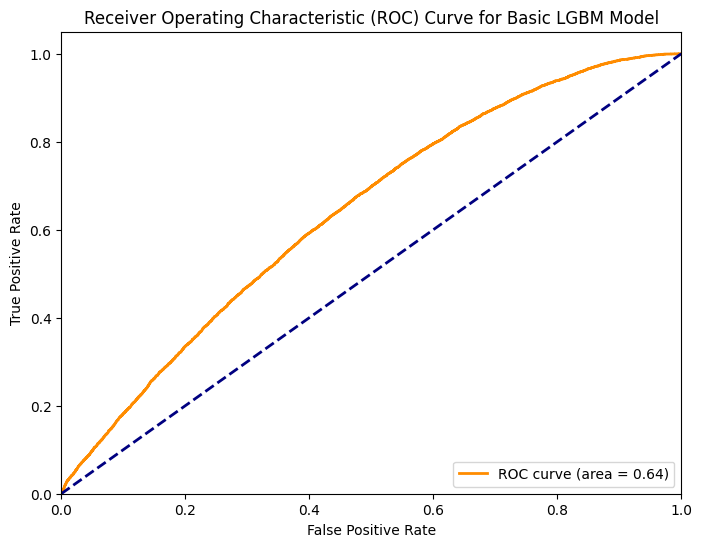

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class from the basic model
y_prob_lgbm = lgbm_model_basic.predict_proba(xtest)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(ytest, y_prob_lgbm)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Basic LGBM Model')
plt.legend(loc="lower right")
plt.show()